# Benchmarks

Timings reported in paper

In [1]:
# %env http_proxy=http://proxyserv:3128
# %env https_proxy=http://proxyserv:3128

In [2]:
%load_ext rpy2.ipython

from IPython.display import Image
from graphviz import Digraph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('ticks')
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina', 'png')

In [3]:
%%R
Sys.setenv("PKG_CPPFLAGS"="-DHAVE_WORKING_LOG1P")

In [4]:
%%R
# install.packages("Matrix")
# install.packages("matrixdist")
# install.packages("expm")


NULL


In [5]:
%%R
# remove.packages("PhaseTypeR")
#devtools::install_github("kaspermunch/PhaseTypeR")

NULL


In [6]:
%%R
devtools::install_github("TobiasRoikjer/PtDAlgorithms")
library(ptdalgorithms)

set.seed(7)

R[write to console]: Downloading GitHub repo TobiasRoikjer/PtDAlgorithms@HEAD



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/private/var/folders/s6/srs8qkh52w1_h32d65z95tth0000gn/T/Rtmp36bYuK/remotes119727922dc56/TobiasRoikjer-PtDAlgorithms-dfc78fe/DESCRIPTION’ ... OK
* preparing ‘ptdalgorithms’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘ptdalgorithms_1.0.0.tar.gz’



* installing *source* package ‘ptdalgorithms’ ...
** using staged installation
** libs
using C++ compiler: ‘clang version 16.0.6’
using SDK: ‘MacOSX14.4.sdk’


arm64-apple-darwin20.0.0-clang++ -std=gnu++17 -I"/Users/kmt/miniconda3/envs/phasetype/lib/R/include" -DNDEBUG -DHAVE_WORKING_LOG1P -I'/Users/kmt/miniconda3/envs/phasetype/lib/R/library/Rcpp/include' -D_FORTIFY_SOURCE=2 -isystem /Users/kmt/miniconda3/envs/phasetype/include -mmacosx-version-min=11.0 -I/Users/kmt/miniconda3/envs/phasetype/include   -I../api/cpp -I../api/c -Ic/ -Icpp/ -fPIC  -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -stdlib=libc++ -fvisibility-inlines-hidden -fmessage-length=0 -isystem /Users/kmt/miniconda3/envs/phasetype/include -fdebug-prefix-map=/Users/runner/miniforge3/conda-bld/r-base-split_1689933325543/work=/usr/local/src/conda/r-base-4.3.1 -fdebug-prefix-map=/Users/kmt/miniconda3/envs/phasetype=/usr/local/src/conda-prefix  -c RcppExports.cpp -o RcppExports.o
arm64-apple-darwin20.0.0-clang++ -std=gnu++17 -I"/Users/kmt/miniconda3/envs/phasetype/lib/R/include" -DNDEBUG -DHAVE_WORKING_LOG1P -I'/Users/kmt/miniconda3/envs/phasetype/lib/R/library/Rcp

ld: warning: -pie being ignored. It is only used when linking a main executable
installing to /Users/kmt/miniconda3/envs/phasetype/lib/R/library/00LOCK-ptdalgorithms/00new/ptdalgorithms/libs
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (ptdalgorithms)


In [7]:
%%R
library(expm)
library(matrixdist)
library(PhaseTypeR)

R[write to console]: Indlæser krævet pakke: Matrix

R[write to console]: 
Vedhæfter pakke: ‘expm’


R[write to console]: Det følgende objekt er maskeret fra ‘package:Matrix’:

    expm


R[write to console]: 
Vedhæfter pakke: ‘matrixdist’


R[write to console]: Det følgende objekt er maskeret fra ‘package:ptdalgorithms’:

    dph


R[write to console]: Indlæser krævet pakke: igraph

R[write to console]: 
Vedhæfter pakke: ‘igraph’


R[write to console]: De følgende objekter er maskerede fra ‘package:ptdalgorithms’:

    edges, vertices


R[write to console]: De følgende objekter er maskerede fra ‘package:stats’:

    decompose, spectrum


R[write to console]: Det følgende objekt er maskeret fra ‘package:base’:

    union


R[write to console]: 
Vedhæfter pakke: ‘PhaseTypeR’


R[write to console]: De følgende objekter er maskerede fra ‘package:matrixdist’:

    mean, var


R[write to console]: Det følgende objekt er maskeret fra ‘package:Matrix’:

    mean


R[write to console]: Det følg

# Parameters

In [8]:
# %run benchmarks_rabbits_params.ipy
%run benchmarks_kingman_params.ipy
# %run benchmarks_coal_timeinhom_params.ipy
# %run benchmarks_coxian_params.ipy

In [9]:
%%R
niter <- 50

Function for plotting running times:

In [10]:
# def runtime_plot(plot_df, x_labels, y_label, hue_label, 
#                  colors=['#FF0000', '#2901F7', '#05BFC0'], 
#                  legend=True, legend_title=True):
    
#     # with sns.color_palette(colors):
#     with sns.color_palette("Set1"):
#         gs_kw = dict(height_ratios=[50] + [1]*(len(x_labels)-1))
#         fig, axes = plt.subplots(len(x_labels), 1, 
#                                  figsize=(5, 5), 
#                                  gridspec_kw=gs_kw)

#         sns.scatterplot(data=plot_df, x=x_labels[0], y=y_label, hue=hue_label, legend=False, ax=axes[0])    
#         ax = sns.lineplot(data=plot_df, x=x_labels[0], y='seconds', hue=hue_label, ax=axes[0])
#         # ax.set_yscale('log')

#         if not legend_title:
#             legend = axes[0].legend()
#             legend.set_title("")
        
#         leg = ax.get_legend()
#         leg.get_frame().set_linewidth(0.0)
        
#         if not legend:
#             axes[0].get_legend().remove()

#         sns.despine()

#         for i in range(1, len(x_labels)):
#             ax = sns.scatterplot(data=plot_df, x=x_labels[i], y=y_label, hue=hue_label, legend=False, ax=axes[i], alpha=0) 
#             axes[i].get_yaxis().set_visible(False)
#         plt.tight_layout()
#     return fig, axes

In [11]:
def runtime_plot(plot_df, x_labels, y_label, hue_label, 
                 colors=['#FF0000', '#2901F7', '#05BFC0'], 
                 legend=True, legend_title=True, plot_title=None):
    
    # with sns.color_palette(colors):
    with sns.color_palette("Set1"):
        # gs_kw = dict(height_ratios=[50] + [1]*(len(x_labels)-1))
        fig, axes = plt.subplots(1, len(x_labels), 
                                 figsize=(12, 4), 
                                 # gridspec_kw=gs_kw
                                )

        # sns.scatterplot(data=plot_df, x=x_labels[0], y=y_label, hue=hue_label, legend=False, ax=axes[0])    
        # ax = sns.lineplot(data=plot_df, x=x_labels[0], y='seconds', hue=hue_label, ax=axes[0])
        # ax.set_yscale('log')


        for i in range(0, len(x_labels)):
            sns.scatterplot(data=plot_df, x=x_labels[i], y=y_label, hue=hue_label, legend=False, ax=axes[i])    
            ax = sns.lineplot(data=plot_df, x=x_labels[i], y='seconds', hue=hue_label, ax=axes[i])

            if not legend_title:
                legend = axes[i].legend()
                legend.set_title("")
        
            leg = ax.get_legend()
            leg.get_frame().set_linewidth(0.0)
            
            if not legend:
                axes[i].get_legend().remove()
    
            sns.despine()

        if plot_title:
            plt.suptitle(plot_title)
        
        # ax = sns.scatterplot(data=plot_df, x=x_labels[i], y=y_label, hue=hue_label, legend=False, ax=axes[i], alpha=1) 
#            axes[i].get_yaxis().set_visible(False)
        plt.tight_layout()
    return fig, axes

Function for parallel computing:

In [12]:
%%R 

library(parallel)

# cores = 4L
cores = 1L

#cores = strtoi(Sys.getenv("SLURM_CPUS_PER_TASK"))
print(cores)
# # producing a matrix
# apply_grid <- function(fun, a, b) {
#     named_params <- expand.grid(a, b)
#     param_list <- split(named_params, seq(nrow(named_params)))    
#     result_list <- mclapply(param_list, function(x) do.call(fun, as.list(as.vector(unlist(x)))), mc.cores=cores)
#     mat <- array(unlist(result_list), dim = c(2, length(a),length(b)))
#     return(mat)
# }
# fun <- function(i, var) {    
#     return(c(i, var))
# }

# producing a dataframe
apply_grid <- function(fun, a, b) {
    named_params <- expand.grid(a, b)
    param_list <- split(named_params, seq(nrow(named_params)))    
    result_list <- mclapply(param_list, function(x) do.call(fun, as.list(as.vector(unlist(x)))), mc.cores=cores)
    return(do.call(rbind, result_list))
}

# # serial version with lapply 
# apply_grid <- function(fun, a, b) {
#     named_params <- expand.grid(a, b)
#     param_list <- split(named_params, seq(nrow(named_params)))    
#     result_list <- lapply(param_list, function(x) do.call(fun, as.list(as.vector(unlist(x)))))
#     return(do.call(rbind, result_list))
# }


# fun <- function(i, var) {    
#     return(as.data.frame(cbind(k=i, munch=var)))
# }


[1] 1


# Construction time

## Construction functions

### Rabbits

Compile function for constructing rabbit model in C:

In [13]:
%%R
Rcpp::sourceCpp("./cpp/rabbit_construction.cpp")

using C++ compiler: ‘clang version 16.0.6’
using SDK: ‘MacOSX14.4.sdk’
arm64-apple-darwin20.0.0-clang++ -std=gnu++17 -I"/Users/kmt/miniconda3/envs/phasetype/lib/R/include" -DNDEBUG -DHAVE_WORKING_LOG1P  -I"/Users/kmt/miniconda3/envs/phasetype/lib/R/library/Rcpp/include" -I"/Users/kmt/google_drive/projects/phasestype/phase-type-distributions/notebooks/cpp" -D_FORTIFY_SOURCE=2 -isystem /Users/kmt/miniconda3/envs/phasetype/include -mmacosx-version-min=11.0 -I/Users/kmt/miniconda3/envs/phasetype/include    -fPIC  -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -stdlib=libc++ -fvisibility-inlines-hidden -fmessage-length=0 -isystem /Users/kmt/miniconda3/envs/phasetype/include -fdebug-prefix-map=/Users/runner/miniforge3/conda-bld/r-base-split_1689933325543/work=/usr/local/src/conda/r-base-4.3.1 -fdebug-prefix-map=/Users/kmt/miniconda3/envs/phasetype=/usr/local/src/conda-prefix  -c rabbit_construction.cpp -o rabbit_construction.o
rabbit_construction.cpp:9:10: fatal error: './..

R[write to console]: Fejl i Rcpp::sourceCpp("./cpp/rabbit_construction.cpp") : 
  Error 1 occurred building shared library.

R[write to console]: In addition: 
R[write to console]: Advarselsbeskeder:

R[write to console]: 1: replacing previous import ‘matrixdist::logLik’ by ‘stats::logLik’ when loading ‘PhaseTypeR’ 

R[write to console]: 2: replacing previous import ‘matrixdist::cor’ by ‘stats::cor’ when loading ‘PhaseTypeR’ 

R[write to console]: 3: replacing previous import ‘matrixdist::coef’ by ‘stats::coef’ when loading ‘PhaseTypeR’ 

R[write to console]: 4: replacing previous import ‘matrixdist::var’ by ‘stats::var’ when loading ‘PhaseTypeR’ 




Fejl i Rcpp::sourceCpp("./cpp/rabbit_construction.cpp") : 
  Error 1 occurred building shared library.


RInterpreterError: Failed to parse and evaluate line 'Rcpp::sourceCpp("./cpp/rabbit_construction.cpp")\n'.
R error message: 'Fejl i Rcpp::sourceCpp("./cpp/rabbit_construction.cpp") : \n  Error 1 occurred building shared library.'

R version:

In [14]:
%%R
construct_rabbit_graph_R <- function(number_of_rabbits, flooding_rate_l, flooding_rate_r) {
    # We represent the vector as two integers, the number of rabbits on the left and right island
    state_vector_length <- 2
    graph <- create_graph(state_vector_length)
    initial_state <- c(number_of_rabbits, 0)
    # The initial state is the only starting state, with 100% starting probability
    add_edge(
      starting_vertex(graph),
      find_or_create_vertex(graph, initial_state),
      1
    )
    index <- 2
    # Iterate over all unvisited vertices
    while (index <= vertices_length(graph)) {
      vertex <- vertex_at(graph, index)
      state <- vertex$state
      if (state[1] > 0) {
        # Rabbit jump left to right
        child_state <- c(state[1] - 1, state[2] + 1)
        add_edge(
          vertex,
          find_or_create_vertex(graph, child_state),
          1
        )

        # Left island flooding
        child_state <- c(0, state[2])
        add_edge(
          vertex,
          find_or_create_vertex(graph, child_state),
          flooding_rate_l
        )
      }

      if (state[2] > 0) {
        # Rabbit jump right to left
        child_state <- c(state[1] + 1, state[2] - 1)
        add_edge(
          vertex,
          find_or_create_vertex(graph, child_state),
          1
        )
        # Right island flooding with rate of 4
        child_state <- c(state[1], 0)
        add_edge(
          vertex,
          find_or_create_vertex(graph, child_state),
          flooding_rate_r
        )
      }
      index <- index + 1
    }
    return(graph)
}


### Kingman

Compile function for constructing the coalescent in C:

In [15]:
%%R
Rcpp::sourceCpp("./cpp/kingman.cpp")

R version:

In [16]:
%%R 
generate_kingman_graph_R <- function(n) {
  
    state_vector_length <- n
    graph <- create_graph(state_vector_length)
    starting_vertex <- vertex_at(graph, 1)
    initial_state <- rep(0, n)
    initial_state[1] <- n

    add_edge(
      starting_vertex,
      create_vertex(graph, initial_state),
      1
    )
    index <- 2

    while (index <= vertices_length(graph)) {
      vertex <- vertex_at(graph, index)

      # loop over all classes of lineages
      for (i in 1:n) {
        for (j in i:n) {
          state <- vertex$state

          # if same class, there need to be at least two to coalesce
          if (i == j) {
            if (state[i] < 2) {
              next;
            }
            # coal rate
            rate <- state[i] * (state[i] - 1) / 2
          } else {
            # else at least one in each class to coalesce
            if (state[i] < 1 || state[j] < 1) {
              next;
            }
            # number of combinations
            rate <- state[i] * state[j]
          }

          # copy state
          child_state <- state
          # update child state
          child_state[i] <- child_state[i] - 1
          child_state[j] <- child_state[j] - 1
          child_state[i+j] <- child_state[i+j] + 1

          add_edge(
              vertex,
              find_or_create_vertex(graph, child_state),
              rate, c(rate)
            )
        }
      }

      index <- index + 1
    }

    return(graph)
}

### Coal timeinhom

R version:

In [17]:
%%R 
generate_coal_timeinhom_graph_R <- function(n) {

    standard_coalescent <- function(n, size, graph=NULL, edge_trans=NULL, epoque=0) {
    
        state_vector_length <- n + 1
    
        if (is.null(graph)) {
        
            graph <- create_graph(state_vector_length)
            starting_vertex <- vertex_at(graph, 1)
            initial_state <- c(rep(0, n), epoque)
            initial_state[1] <- n
            
            add_edge(
              starting_vertex,
              create_vertex(graph, initial_state),
              1
            )
            index <- 2
            
        } else {
            nr_states <- vertices_length(graph)
            for (i in 2:(nr_states-1)) {
                if (is.nan(edge_trans[i-1])) {
                    next;
                }
                vertex <- vertex_at(graph, i)
                state <- vertex$state
                sister_state <- state
                sister_state[length(sister_state)] <- epoque
                add_edge(
                  vertex,
                  find_or_create_vertex(graph, sister_state),
                  edge_trans[i-1], c(edge_trans[i-1]) # -1 becuase first index is 2 and first element of edge_trans is 1
                )
            }
            index <- nr_states + 1
        }
    
        while (index <= vertices_length(graph)) {
          vertex <- vertex_at(graph, index)
    
            # loop over all classes of lineages
          for (i in 1:n) {
            for (j in i:n) {
              state <- vertex$state
    
              # if same class, there need to be at least two to coalesce
              if (i == j) {
                if (state[i] < 2) {
                  next; # an absorbing state that is not the last state
                }
                # coal rate
                rate <- state[i] * (state[i] - 1) / 2
              } else {
                # else at least one in each class to coalesce
                if (state[i] < 1 || state[j] < 1) {
                  next;
                }
                # number of combinations
                rate <- state[i] * state[j]
              }
    
              rate = rate / size
                
              # copy state
              child_state <- state
                
              # update child state
              child_state[i] <- child_state[i] - 1
              child_state[j] <- child_state[j] - 1
              child_state[i+j] <- child_state[i+j] + 1
    
              add_edge(
                  vertex,
                  find_or_create_vertex(graph, child_state),
                  rate, c(rate)
                )
            }
          }
            
          index <- index + 1
        }
        if (epoque == 0) {
            return(graph)
        }
    }
    
    add_epoque <- function(n, graph, epoque_trans, epoque, size)
        return(standard_coalescent(n, graph, epoque_trans, epoque, size))

    n_samples <- n
    epoques <- c(0, 1, 2)
    sizes <- c(1, 5, 10)
    graph <- standard_coalescent(n_samples, sizes[1])
    if (length(epoques) > 1) {
        for (i in 2:length(epoques)) {
            x <- stop_probability(graph, epoques[i])
            stop_probs <- x[2:(length(x)-1)]
            x <- accumulated_visiting_time(graph, epoques[i])
            accum_v_time <- x[2:(length(x)-1)]
            epoque_trans_rates <- stop_probs / accum_v_time
            add_epoque(n_samples, sizes[i], graph, epoque_trans_rates, i-1)
        }
    }

    return(graph)
}

generate_coal_timeinhom_graph <- generate_coal_timeinhom_graph_R

## Time construction

In [ ]:
%%time
%%R -o construction_df
construction_times_fun <- function(i, val) {
    time_R <- NA
    if (val <= max_construction_values_for_R) {
        start <- proc.time()[3]            
        construction_fun_R(val)
        end <- proc.time()[3]
        time_R <- end-start
    } 

    start <- proc.time()[3]
    graph <- construction_fun(val)
    end <- proc.time()[3]
    time_c = end-start

    vertices <- vertices_length(graph)
    edges <- number_of_edges(graph)
          
    time_from_matrix <- NA
    if (val <= max_construction_values_for_matrix) {
        M <- graph_as_matrix(graph)
        start <- proc.time()[3]
        mat <- matrix_as_graph(M$IPV, M$SIM)
        end <- proc.time()[3]
        time_from_matrix = end-start
    }
    df <- as.data.frame(cbind(val=val, 
                          time_R=time_R, 
                          time_c=time_c,
                          time_from_matrix=time_from_matrix,
                          vertices=vertices, 
                          edges=edges))
    return(df)
}
construction_df <- apply_grid(construction_times_fun, 1:(niter*2), construction_values)

In [64]:
construction_df.to_hdf(f'benchmark_data/construction_df_{str(label[0])}.hdf', 'df')

/var/folders/s6/srs8qkh52w1_h32d65z95tth0000gn/T/ipykernel_30894/1823715927.py:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  construction_df.to_hdf(f'benchmark_data/construction_df_{str(label[0])}.hdf', 'df')


Single example with large number of units:

In [65]:
# %%time
# %%R
# # graph <- construction_fun(500)
# graph <- construction_fun(20)

# Time computation

In [66]:
# %%R
# # # graph <- construction_fun(500)
# graph <- construction_fun(200)

In [67]:
# %%time
# %%R
# ptdalgorithms::expectation(graph)

In [68]:
# %%R
# M <- graph_as_matrix(graph)
# Y <- PhaseTypeR::PH(M$SIM, M$IPV)            
# system.time(PhaseTypeR::mean(Y))

In [69]:
# %%R
# graph <- construction_fun(30)
# M <- graph_as_matrix(graph)
# system.time(matrix_as_graph(M$IPV, M$SIM))


## Compare base::solve() against matrixdist:::matrix_inverse()

In [70]:
%%time
%%R -o base_times -o matrixdist_times
base_times <- c()
matrixdist_times <- c()
for (val in expectation_construction_values) {
    if (val <= expectation_max_construction_values_for_matrix/2) {
        graph <- construction_fun(val)
        mat <- graph_as_matrix(graph)$SIM
        base_times <- c(base_times, system.time(MI1 <- base::solve(mat))[3])
        matrixdist_times <- c(matrixdist_times, system.time(MI2 <- matrixdist:::matrix_inverse(mat))[3])
    }
}

CPU times: user 1.03 s, sys: 10.2 ms, total: 1.05 s
Wall time: 1.05 s


In [71]:
np.save(f'benchmark_data/base_times_{str(label[0])}.npy', base_times)
np.save(f'benchmark_data/matrixdist_times_{str(label[0])}.npy', matrixdist_times)

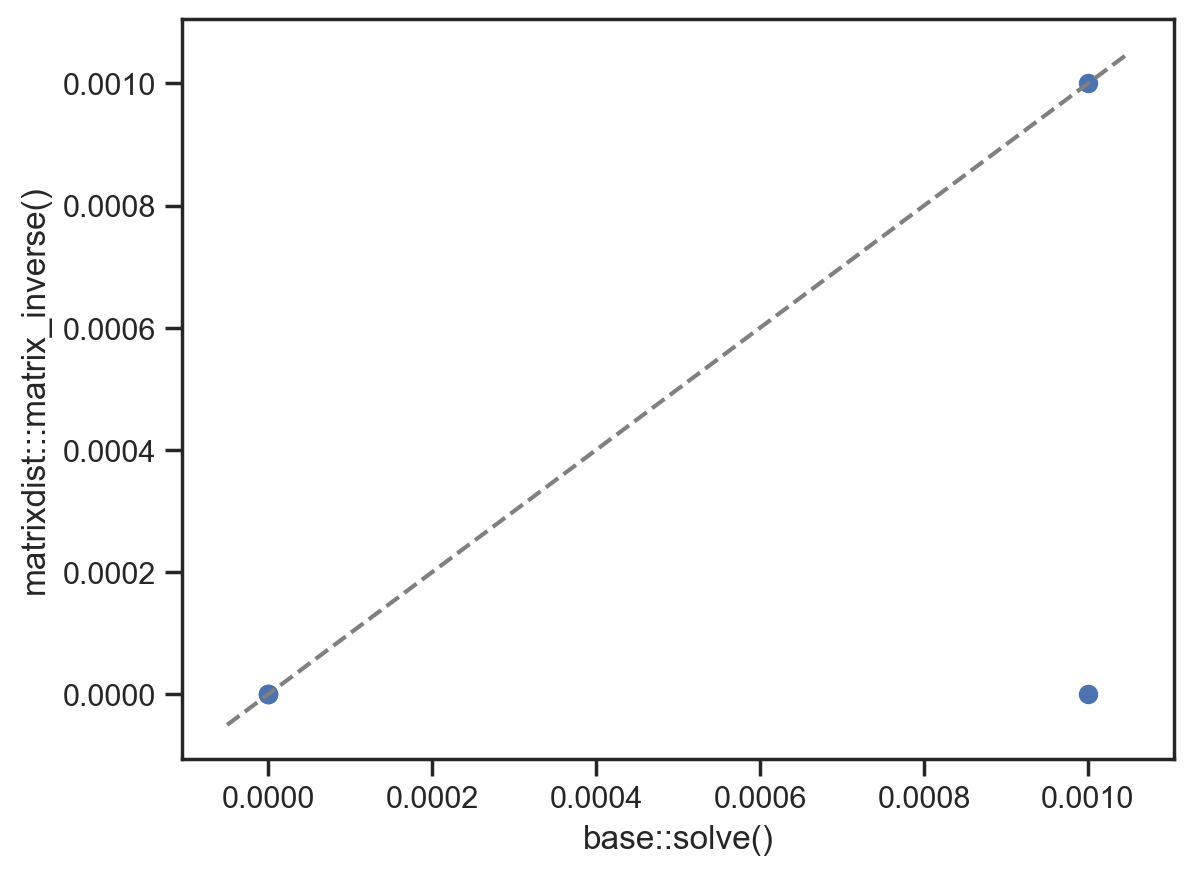

In [72]:
def abline(slope, intercept, ax=None):
    "Add a straight line through the plot"
    if ax is None:
        ax = plt.gca()
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, '--', color='grey')
    
plt.scatter(base_times, matrixdist_times)
plt.xlabel('base::solve()')
plt.ylabel('matrixdist:::matrix_inverse()')
abline(1, 0)
plt.savefig(f'figures/inversion_test_{str(label[0])}.pdf')   

## Test methods for exponentiation with expm()

In [73]:
%%time
%%R -o expm_tests_all_methods

results <- data.frame()
for (i in 1:niter) {
    for (val in expectation_construction_values){
        if (val <= expectation_max_construction_values_for_matrix/2) {
            for (method in c("Higham08.b", "Higham08", "AlMohy-Hi09", "Ward77", "PadeRBS", 
                             # "Pade", "PadeO", "TaylorO", .. the slowest ones
                             # "R_Eigen",   ... does not work with rabbits
                             "Taylor", "R_Pade", "R_Ward77", "hybrid_Eigen_Ward")) {

                graph <- construction_fun(val)
                vertices <- vertices_length(graph)
                edges <- number_of_edges(graph)
                mat <- graph_as_matrix(graph)$SIM
                start <- proc.time()[3]
                expm::expm(mat, method=method)
                stop <- proc.time()[3]
                time_spent_exp <- stop - start

                results <- rbind(results, data.frame(val=val,
                                                     vertices=vertices,
                                                     edges=edges,
                                                     time_spent_exp=time_spent_exp,
                                                     method=method))
            }
        }
    }
}

expm_tests_all_methods <- results

CPU times: user 1min 20s, sys: 2.99 s, total: 1min 23s
Wall time: 26.6 s


In [74]:
expm_tests_all_methods.to_hdf(f'benchmark_data/expm_tests_all_methods_{str(label[0])}.hdf', 'df')

/var/folders/s6/srs8qkh52w1_h32d65z95tth0000gn/T/ipykernel_30894/2603064868.py:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  expm_tests_all_methods.to_hdf(f'benchmark_data/expm_tests_all_methods_{str(label[0])}.hdf', 'df')


In [75]:
expm_tests_all_methods = pd.read_hdf(f'benchmark_data/expm_tests_all_methods_{str(label[0])}.hdf')

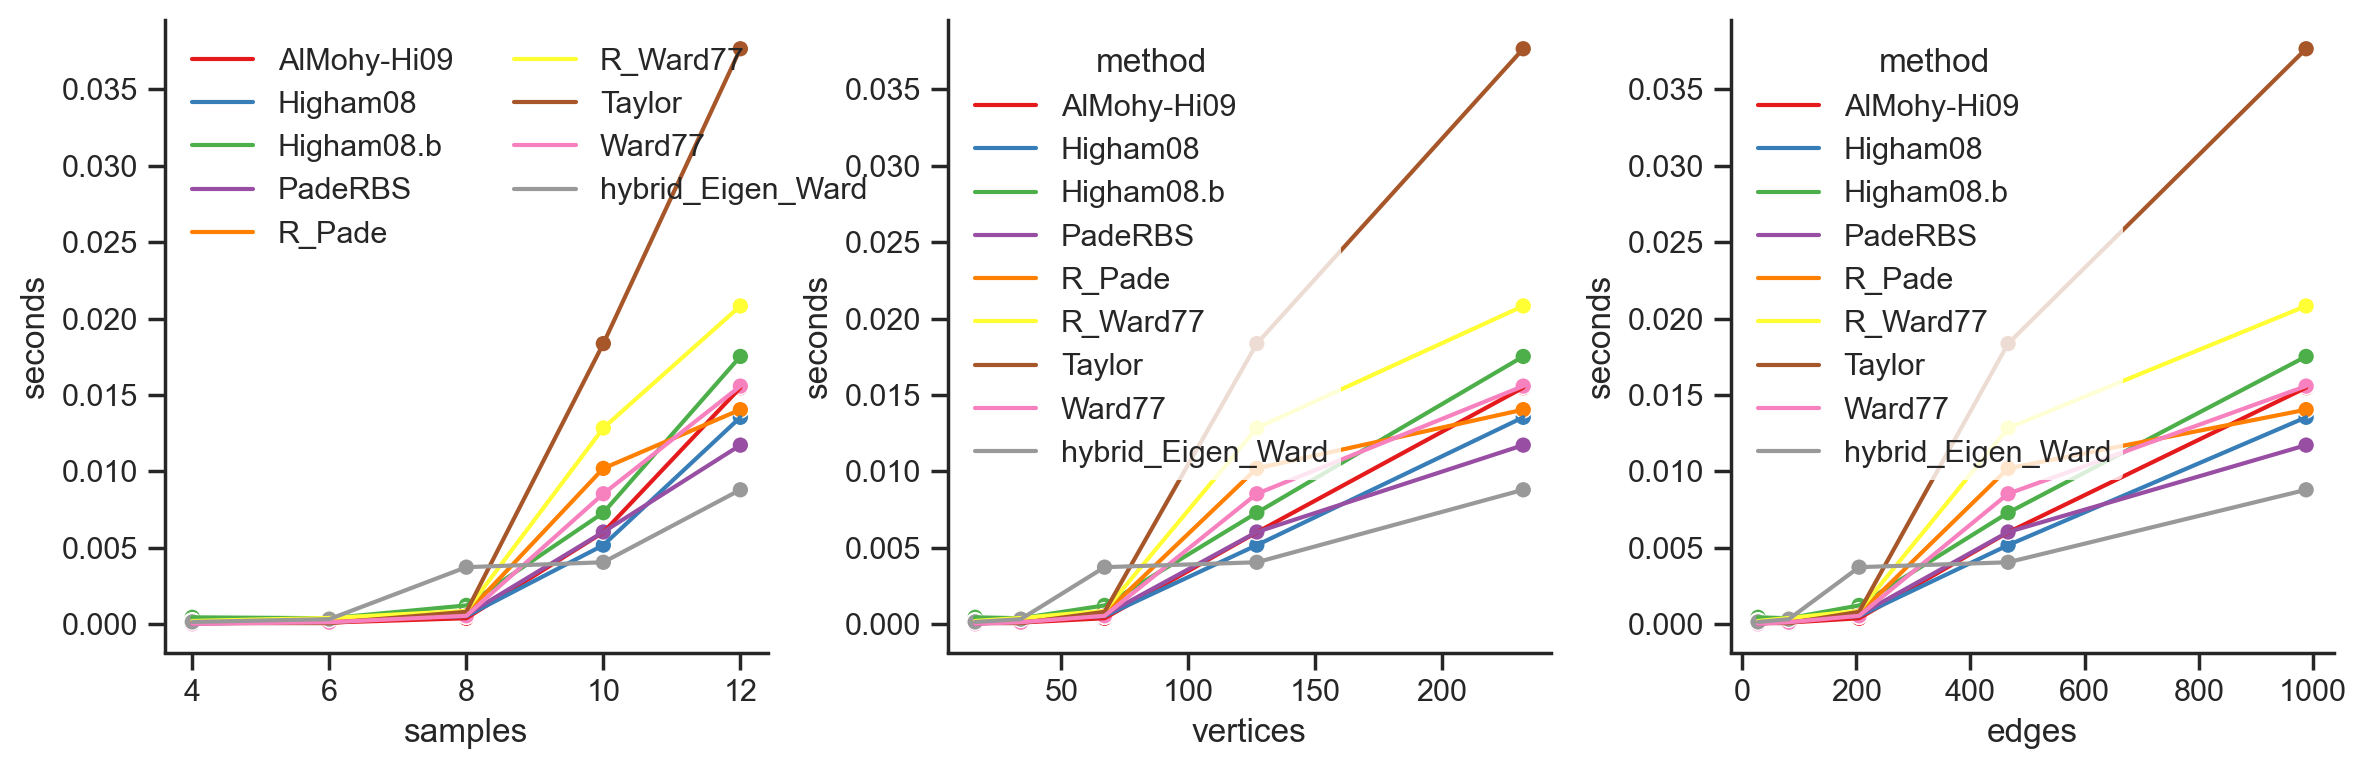

In [78]:
plot_df = (expm_tests_all_methods.groupby(['val', 'vertices', 'edges', 'method'])
 .agg('mean') 
 .reset_index()
 .rename(columns={'time_spent_exp': 'seconds', 'val': str(units[0])})
)
fig, axes = runtime_plot(plot_df, [str(units[0]), 'vertices', 'edges'], 'seconds', 'method')
axes[0].legend(ncol=2, loc="upper left", framealpha=0)
#axes[0].set_yscale('log')
plt.savefig(f'figures/expm_tests_all_methods_{str(label[0])}.pdf')   

## Functions for timing

Comparing phasetyper, matrixdist ptdalgorithms.

PhaseTyper uses base::solve() for inversion

Reviewer two says matrixdist::matrix_inverse() is much faster for sparse matrices. However, only some phase-type distributions fit coxian or erlang forms and our tool is a general one. For the phase-type distributions used as mdoels here matrixdist is not faster:



In [18]:
%%R 

cdf_vals <- seq(from = 0.1, to = 10, by = 0.1)

expectation_fun <- function(i, val) {
    graph <- construction_fun(val)
    vertices <- vertices_length(graph)
    edges <- number_of_edges(graph)
    M <- graph_as_matrix(graph)
    phasetyper_time <- NA
    ptdalgorithms_time <- NA
    if (val <= expectation_max_construction_values_for_matrix) {
        Y <- PH(M$SIM, M$IPV)            
        start <- proc.time()[3]
        PhaseTypeR::mean(Y)
        end <- proc.time()[3]
        phasetyper_time <- end - start
    }
    start <- proc.time()[3]
    ptdalgorithms::expectation(graph)
    end <- proc.time()[3]
    ptdalgorithms_time = end-start
    df <- as.data.frame(cbind(val=val, 
                              ptdalgorithms_time=ptdalgorithms_time, 
                              phasetyper_time=phasetyper_time,
                              vertices=vertices, 
                              edges=edges))
    return(df)
}
                      
moments100_fun <- function(i, val) {
    graph <- construction_fun(val)
    vertices <- vertices_length(graph)
    edges <- number_of_edges(graph)    
    M <- graph_as_matrix(graph)
    phasetyper_time <- NA
    ptdalgorithms_time <- NA
    if (val <= moments100_max_construction_values_for_matrix) {
        Y <- PH(M$SIM, M$IPV)            
        rewards <- rep(1, length(M$IPV))
        start <- proc.time()[3]
        for (i in 1:100) {
           Y <- PhaseTypeR::reward_phase_type(Y, rewards)
           PhaseTypeR::mean(Y)
        }
        end <- proc.time()[3]
        phasetyper_time <- end - start                     
    }
    start <- proc.time()[3]
    rewards <- rep(1, length(rowSums(states(graph))))
    for (i in 1:100) {
       graph <- reward_transform(graph, rewards)
       expectation(graph)
    }
    end <- proc.time()[3]
    ptdalgorithms_time = end-start
    df <- as.data.frame(cbind(val=val, 
                              ptdalgorithms_time=ptdalgorithms_time, 
                              phasetyper_time=phasetyper_time,
                              vertices=vertices, 
                              edges=edges))
    return(df)
}

cdf100_fun <- function(i, val) {
    graph <- construction_fun(val)
    vertices <- vertices_length(graph)
    edges <- number_of_edges(graph)    
    x <- seq(from = 0.1, to = 50, by = 0.1)
    y <- ptdalgorithms::pph(x, graph)
    max_t <- approx(y, x, 0.99)$y
    cdf_samples <- seq((max_t-2)/100, max_t, (max_t-2)/100)
    
    graph <- construction_fun(val)
    phasetyper_time <- NA
    ptdalgorithms_time <- NA
    start <- proc.time()[3]
    ptdcdf <- ptdalgorithms::pph(cdf_samples, graph, 10000)
    stop <- proc.time()[3]
    ptdalgorithms_time <- stop - start
    if (val <= cdf100_max_construction_values_for_matrix) {
         M <- graph_as_matrix(graph)
        start <- proc.time()[3]
        Y <- PhaseTypeR::PH(M$SIM, M$IPV)
        PhaseTypeR::pPH(cdf_samples, Y)
        stop <- proc.time()[3]
        phasetyper_time <- stop - start
    }
    df <- as.data.frame(cbind(val=val, 
                              ptdalgorithms_time=ptdalgorithms_time, 
                              phasetyper_time=phasetyper_time,
                              vertices=vertices, 
                              edges=edges))
    return(df) 
}

## Expectation

In [80]:
%%time
%%R -o expectation_df

expectation_df <- apply_grid(expectation_fun, 1:(niter), expectation_construction_values)

INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward com

CPU times: user 32.8 s, sys: 3.33 s, total: 36.2 s
Wall time: 31.3 s


INFO: building reward compute graph...


In [81]:
expectation_df.to_hdf(f'benchmark_data/expectation_df_{str(label[0])}.hdf', 'df')

/var/folders/s6/srs8qkh52w1_h32d65z95tth0000gn/T/ipykernel_30894/2159312211.py:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  expectation_df.to_hdf(f'benchmark_data/expectation_df_{str(label[0])}.hdf', 'df')


In [61]:
%%R

library(rhdf5)

standard_coalescent <- function(n) {
          
    state_vector_length <- n + 1
    graph <- create_graph(state_vector_length)
    starting_vertex <- vertex_at(graph, 1)
    initial_state <- c(rep(0, n), 0)
    initial_state[1] <- n
    
    add_edge(
      starting_vertex,
      find_or_create_vertex(graph, initial_state),
      1
    )
    index <- 2
    
    while (index <= vertices_length(graph)) {
      vertex <- vertex_at(graph, index)
      
      # loop over all classes of lineages
      for (i in 1:n) {
        for (j in i:n) {
          state <- vertex$state
          
          # if same class, there need to be at least two to coalesce
          if (i == j) {
            if (state[i] < 2) {
              next;
            }
            # coal rate
            rate <- state[i] * (state[i] - 1) / 2
          } else {
            # else at least one in each class to coalesce
            if (state[i] < 1 || state[j] < 1) {
              next;
            }
            # number of combinations
            rate <- state[i] * state[j]
          }
          
          # copy state
          child_state <- state
          # update child state
          child_state[i] <- child_state[i] - 1
          child_state[j] <- child_state[j] - 1
          child_state[i+j] <- child_state[i+j] + 1

          add_edge(
              vertex,
              find_or_create_vertex(graph, child_state),
              rate, c(rate)
            )
        }
      }
          
      index <- index + 1
    }
    return(graph)
}

block_coalescent <- function(n) {
      
    state_vector_length <- 1
    graph <- create_graph(state_vector_length)
    starting_vertex <- vertex_at(graph, 1)
    initial_state <- c(0)
    initial_state[1] <- n
    add_edge(starting_vertex, create_vertex(graph, initial_state), 1)
    index <- 2
    
    while (index <= vertices_length(graph)) {
      vertex <- vertex_at(graph, index)
      state <- vertex$state
      if (state[1] == 1) {
        break
      }
      rate <- state[1] * (state[1] - 1) / 2
      child_state <- state
      child_state[1] <- child_state[1] - 1
      add_edge(vertex, find_or_create_vertex(graph, child_state), rate)
      index <- index + 1
    }
    return(graph)
}

sfs_rewards <- function(graph, sample_size) {
    name <- paste("coalescent/", sample_size, sep="")
    h5f <- H5Fopen("../coal_block_rewards.h5")
    if (H5Lexists(h5f, name)) {
        rewards <- h5read(h5f, name=paste("coalescent/", sample_size, sep=""))
    } else {
        tensor_dims <- c(sample_size, vertices_length(graph))    
        reward_list <- lapply(1:vertices_length(graph), 
                              function(i) do.call(reward_fun, as.list(c(sample_size, vertex_at(graph, i)$state))))
        rewards <- array(unlist(reward_list), dim=tensor_dims)
        h5write(rewards, 
                h5f, 
                name=paste("coalescent/", sample_size, sep=""))
    }
    H5Fclose(h5f)                              
    return(rewards)
}

sfs_fun <- function(i, val) {

    coal_ptdalgorithms_time <- NA
    coal_vertices <- NA
    coal_edges <- NA
    if (val <= sfs_max_construction_values_for_coal) {
        graph <- standard_coalescent(val)
        rewards <- states(graph)
        coal_vertices <- vertices_length(graph)
        coal_edges <- number_of_edges(graph)
        start <- proc.time()[3]
        sfs <- apply(rewards, 2, function(x) ptdalgorithms::expectation(graph, x))
        end <- proc.time()[3]
        coal_ptdalgorithms_time = end-start
    }
    graph <- block_coalescent(val)
    block_vertices <- vertices_length(graph)
    block_edges <- number_of_edges(graph)
    rewards <- sfs_rewards(graph, val)
    block_ptdalgorithms_time <- NA
    start <- proc.time()[3]
    sfs <- apply(rewards, 1, function(x) ptdalgorithms::expectation(graph, x))
    end <- proc.time()[3]
    block_ptdalgorithms_time = end-start

    df <- as.data.frame(cbind(val=val, 
                              coal_ptdalgorithms_time=coal_ptdalgorithms_time, 
                              coal_vertices=coal_vertices, 
                              coal_edges=coal_edges,
                              block_ptdalgorithms_time=block_ptdalgorithms_time, 
                              block_vertices=block_vertices, 
                              block_edges=block_edges                       
                             ))
    return(df)
}


In [62]:
# rewards <- states(graph)
# apply(rewards, 2, function(x) ptdalgorithms::expectation(graph, x))]

In [63]:
# graph <- block_coalescent(6)
# rewards <- sfs_rewards(graph, 6)
# sfs <- apply(rewards, 1, function(x) ptdalgorithms::expectation(graph, x))
# sfs

In [64]:
%%R -o sfs_df

sfs_df <- apply_grid(sfs_fun, 1:niter, sfs_construction_values)
sfs_df

INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward com

     val coal_ptdalgorithms_time coal_vertices coal_edges
1      4                   0.000             6          6
2      4                   0.000             6          6
3      4                   0.000             6          6
4      4                   0.000             6          6
5      4                   0.000             6          6
6      4                   0.000             6          6
7      4                   0.000             6          6
8      4                   0.000             6          6
9      4                   0.000             6          6
10     4                   0.000             6          6
11     4                   0.000             6          6
12     4                   0.000             6          6
13     4                   0.000             6          6
14     4                   0.000             6          6
15     4                   0.000             6          6
16     4                   0.000             6          6
17     4      

INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...


   6                   0.000            12         18
59     6                   0.000            12         18
60     6                   0.000            12         18
61     6                   0.000            12         18
62     6                   0.001            12         18
63     6                   0.000            12         18
64     6                   0.000            12         18
65     6                   0.000            12         18
66     6                   0.000            12         18
67     6                   0.000            12         18
68     6                   0.000            12         18
69     6                   0.000            12         18
70     6                   0.000            12         18
71     6                   0.000            12         18
72     6                   0.000            12         18
73     6                   0.000            12         18
74     6                   0.000            12         18
75     6          

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




938   40                      NA            NA         NA
939   40                      NA            NA         NA
940   40                      NA            NA         NA
941   40                      NA            NA         NA
942   40                      NA            NA         NA
943   40                      NA            NA         NA
944   40                      NA            NA         NA
945   40                      NA            NA         NA
946   40                      NA            NA         NA
947   40                      NA            NA         NA
948   40                      NA            NA         NA
949   40                      NA            NA         NA
950   40                      NA            NA         NA
951   42                      NA            NA         NA
952   42                      NA            NA         NA
953   42                      NA            NA         NA
954   42                      NA            NA         NA
955   42     

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



          12
224                     0.000             13          12
225                     0.001             13          12
226                     0.000             13          12
227                     0.000             13          12
228                     0.000             13          12
229                     0.000             13          12
230                     0.000             13          12
231                     0.000             13          12
232                     0.000             13          12
233                     0.000             13          12
234                     0.001             13          12
235                     0.001             13          12
236                     0.000             13          12
237                     0.000             13          12
238                     0.000             13          12
239                     0.000             13          12
240                     0.000             13          12
241               

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



          58
1386                    0.000             59          58
1387                    0.001             59          58
1388                    0.000             59          58
1389                    0.000             59          58
1390                    0.000             59          58
1391                    0.000             59          58
1392                    0.000             59          58
1393                    0.000             59          58
1394                    0.000             59          58
1395                    0.000             59          58
1396                    0.000             59          58
1397                    0.000             59          58
1398                    0.000             59          58
1399                    0.001             59          58
1400                    0.000             59          58
1401                    0.001             61          60
1402                    0.000             61          60
1403              

In [67]:
sfs_df.to_hdf(f'benchmark_data/sfs_df{str(label[0])}.hdf', 'df')

/var/folders/s6/srs8qkh52w1_h32d65z95tth0000gn/T/ipykernel_61526/2353773415.py:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  sfs_df.to_hdf(f'benchmark_data/sfs_df{str(label[0])}.hdf', 'df')


In [66]:
sfs_df.head()

val  coal_ptdalgorithms_time  coal_vertices  coal_edges  \
1  4.0                      0.0            6.0         6.0   
2  4.0                      0.0            6.0         6.0   
3  4.0                      0.0            6.0         6.0   
4  4.0                      0.0            6.0         6.0   
5  4.0                      0.0            6.0         6.0   

   block_ptdalgorithms_time  block_vertices  block_edges  
1                     0.000             5.0          4.0  
2                     0.001             5.0          4.0  
3                     0.000             5.0          4.0  
4                     0.000             5.0          4.0  
5                     0.000             5.0          4.0

## 100 moments

In [25]:
%%time
%%R -o moments100_df

moments100_df <- apply_grid(moments100_fun, 1:niter, moments100_construction_values)

INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward com

CPU times: user 2h 49min 8s, sys: 6min 15s, total: 2h 55min 24s
Wall time: 3h 15min 4s


INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward compute graph...
INFO: building reward com

In [16]:
moments100_df.to_hdf(f'benchmark_data/moments100_df_{str(label[0])}.hdf', key='df')

NameError: name 'moments100_df' is not defined

In [ ]:

block_expectation_fun <- function(i, val) {
    graph <- block_coalescent(val)
    rewards <- sfs_rewards(graph, val)
    vertices <- vertices_length(graph)
    edges <- number_of_edges(graph)
    ptdalgorithms_time <- NA
    start <- proc.time()[3]
    ptdalgorithms::expectation(graph, rewards)
    end <- proc.time()[3]
    ptdalgorithms_time = end-start
    df <- as.data.frame(cbind(val=val, 
                              ptdalgorithms_time=ptdalgorithms_time, 
                              vertices=vertices, 
                              edges=edges))
    return(df)
}


## CDF 100 values

In [14]:
%%time
%%R -o cdf100_df  

cdf100_df <- apply_grid(cdf100_fun, 1:niter, cdf100_construction_values)

CPU times: user 5h 23min 1s, sys: 9min 2s, total: 5h 32min 4s
Wall time: 5h 11min 11s


In [18]:
cdf100_df.to_hdf(f'benchmark_data/cdf100_df_{str(label[0])}.hdf', key='df')

# Plots

## Time inhomogeneous coalescent

In [29]:
construction_df = pd.read_hdf(f'benchmark_data/construction_df_coal_timeinhom.hdf')

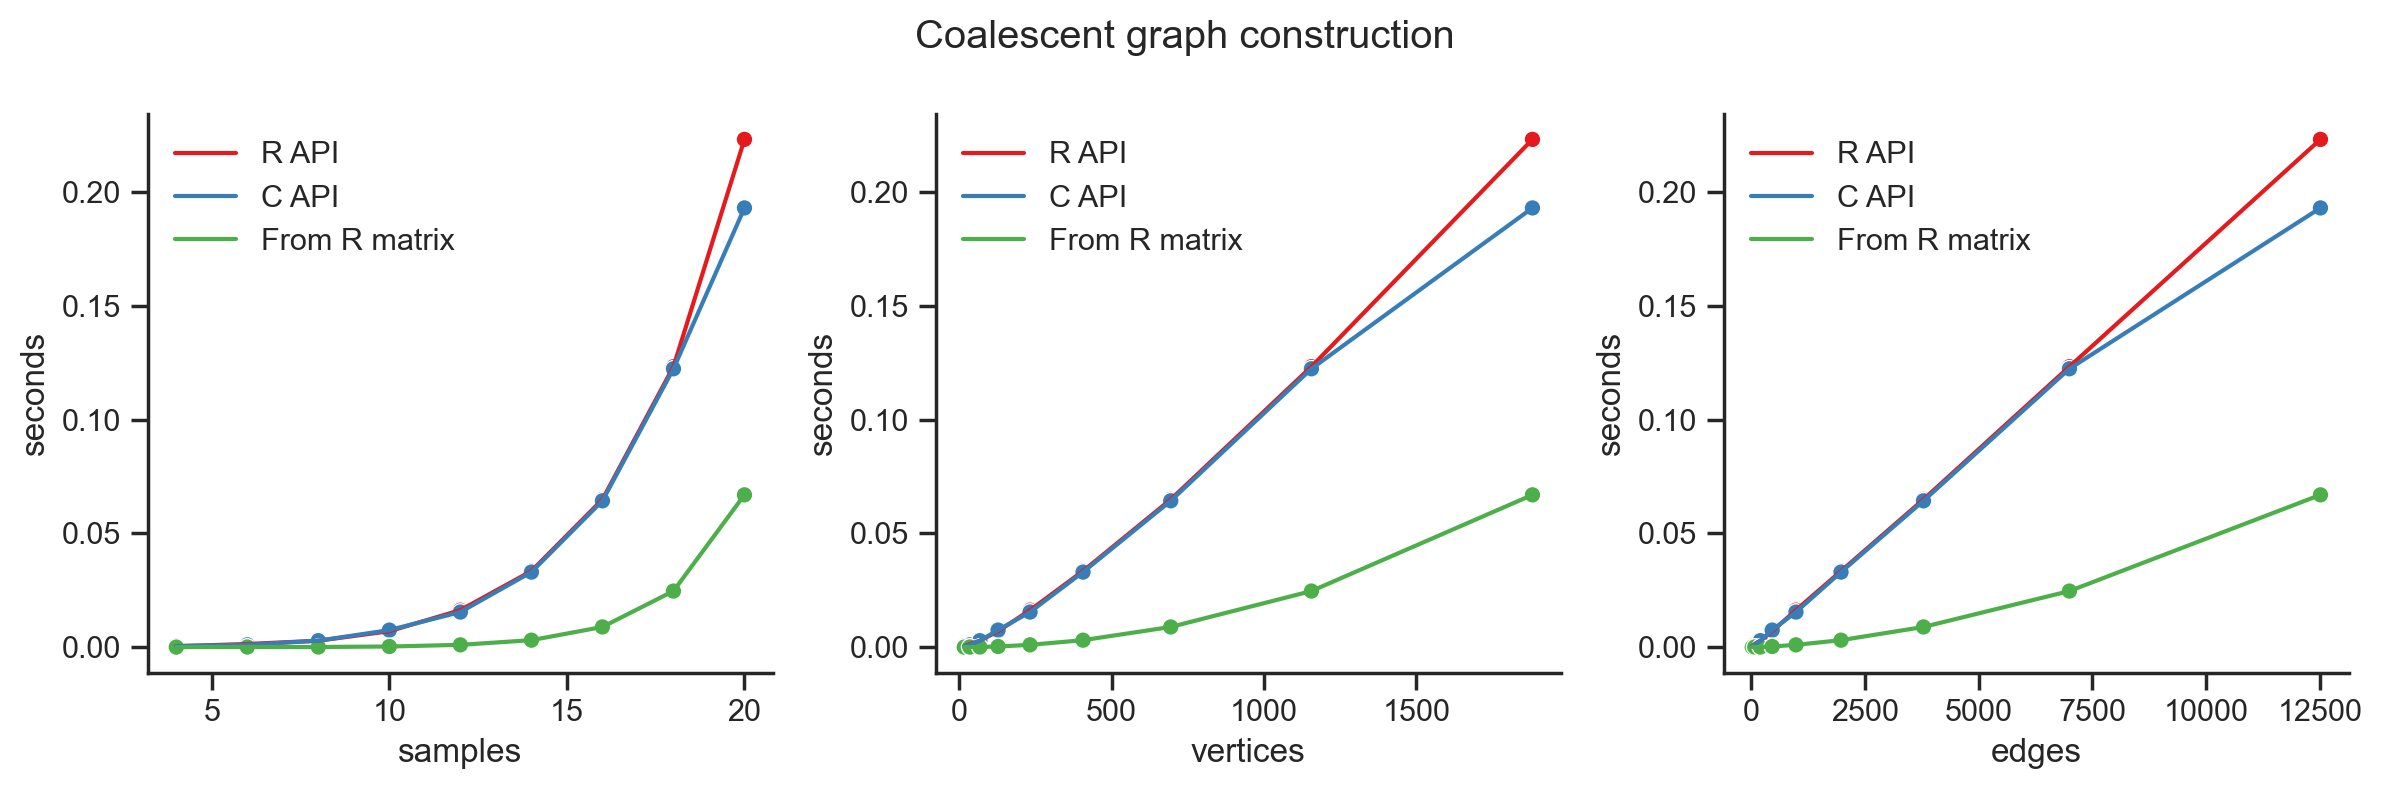

In [30]:
plot_df = (construction_df.groupby(['val', 'vertices', 'edges'])
 .agg('mean') 
 .reset_index()
 .rename(columns={'val': 'samples', 'time_c': 'C API', 'time_R': 'R API', 'time_from_matrix': 'From R matrix'})
 .melt(id_vars=['samples', 'vertices', 'edges'], value_name='seconds', var_name='API')
)
plot_df = plot_df.loc[plot_df.seconds < 2]

fig, axes = runtime_plot(plot_df, ['samples', 'vertices', 'edges'], 'seconds', 'API', 
            legend_title=False, plot_title="Coalescent graph construction")

plt.savefig(f'figures/construction_coal_timeinhom.pdf')

In [50]:
# plot_df.groupby('API').samples.max()

In [32]:
expectation_df = pd.read_hdf(f'benchmark_data/expectation_df_coal_timeinhom.hdf')

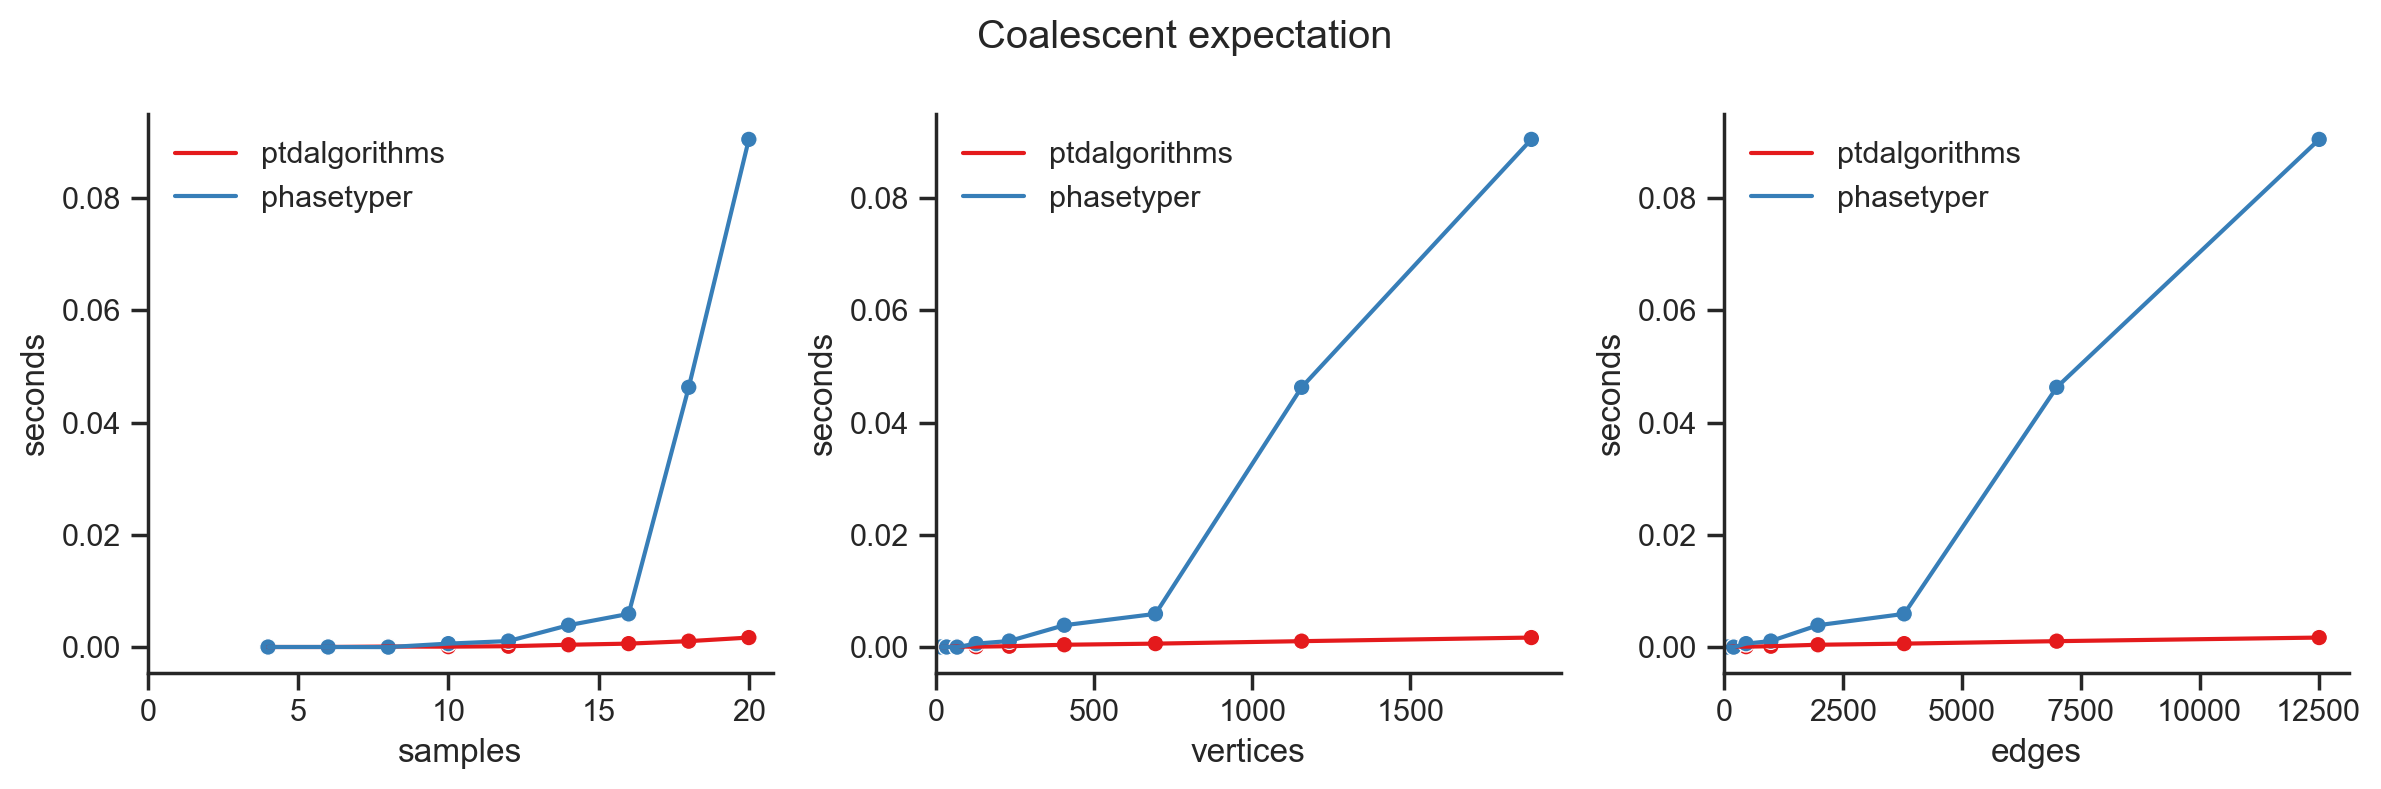

In [33]:
plot_df = (expectation_df.groupby(['val', 'vertices', 'edges'])
 .agg('mean') 
 .reset_index()
 .rename(columns={'val': 'samples',
                  'ptdalgorithms_time': 'ptdalgorithms', 
                  'phasetyper_time': 'phasetyper',
                  'matrixdist_time': 'matrixdist::moment()',
                  'matrixdist_inverse_time': 'matrixdist::inverse_matrix()',
                  'solve_time': 'base::solve()'
                 })
 .melt(id_vars=['samples', 'vertices', 'edges'], 
       value_name='seconds', var_name='Method')
)
plot_df = plot_df.loc[plot_df.seconds < 0.15]
fig, axes = runtime_plot(plot_df, ['samples', 'vertices', 'edges'],
                         'seconds', 'Method', legend_title=False, plot_title="Coalescent expectation")
for ax in axes:
    ax.set_xlim(left=0)
plt.savefig(f'figures/expectation_coal_timeinhom.pdf')

In [44]:
# df = pd.pivot(plot_df, index='samples', columns='Method', values=['seconds']).reset_index()
# plt.plot(df.samples, df.seconds.phasetyper / df.seconds.ptdalgorithms)

In [49]:
# plot_df.groupby('Method').samples.max()

In [36]:
moments100_df = pd.read_hdf(f'benchmark_data/moments100_df_coal_timeinhom.hdf')

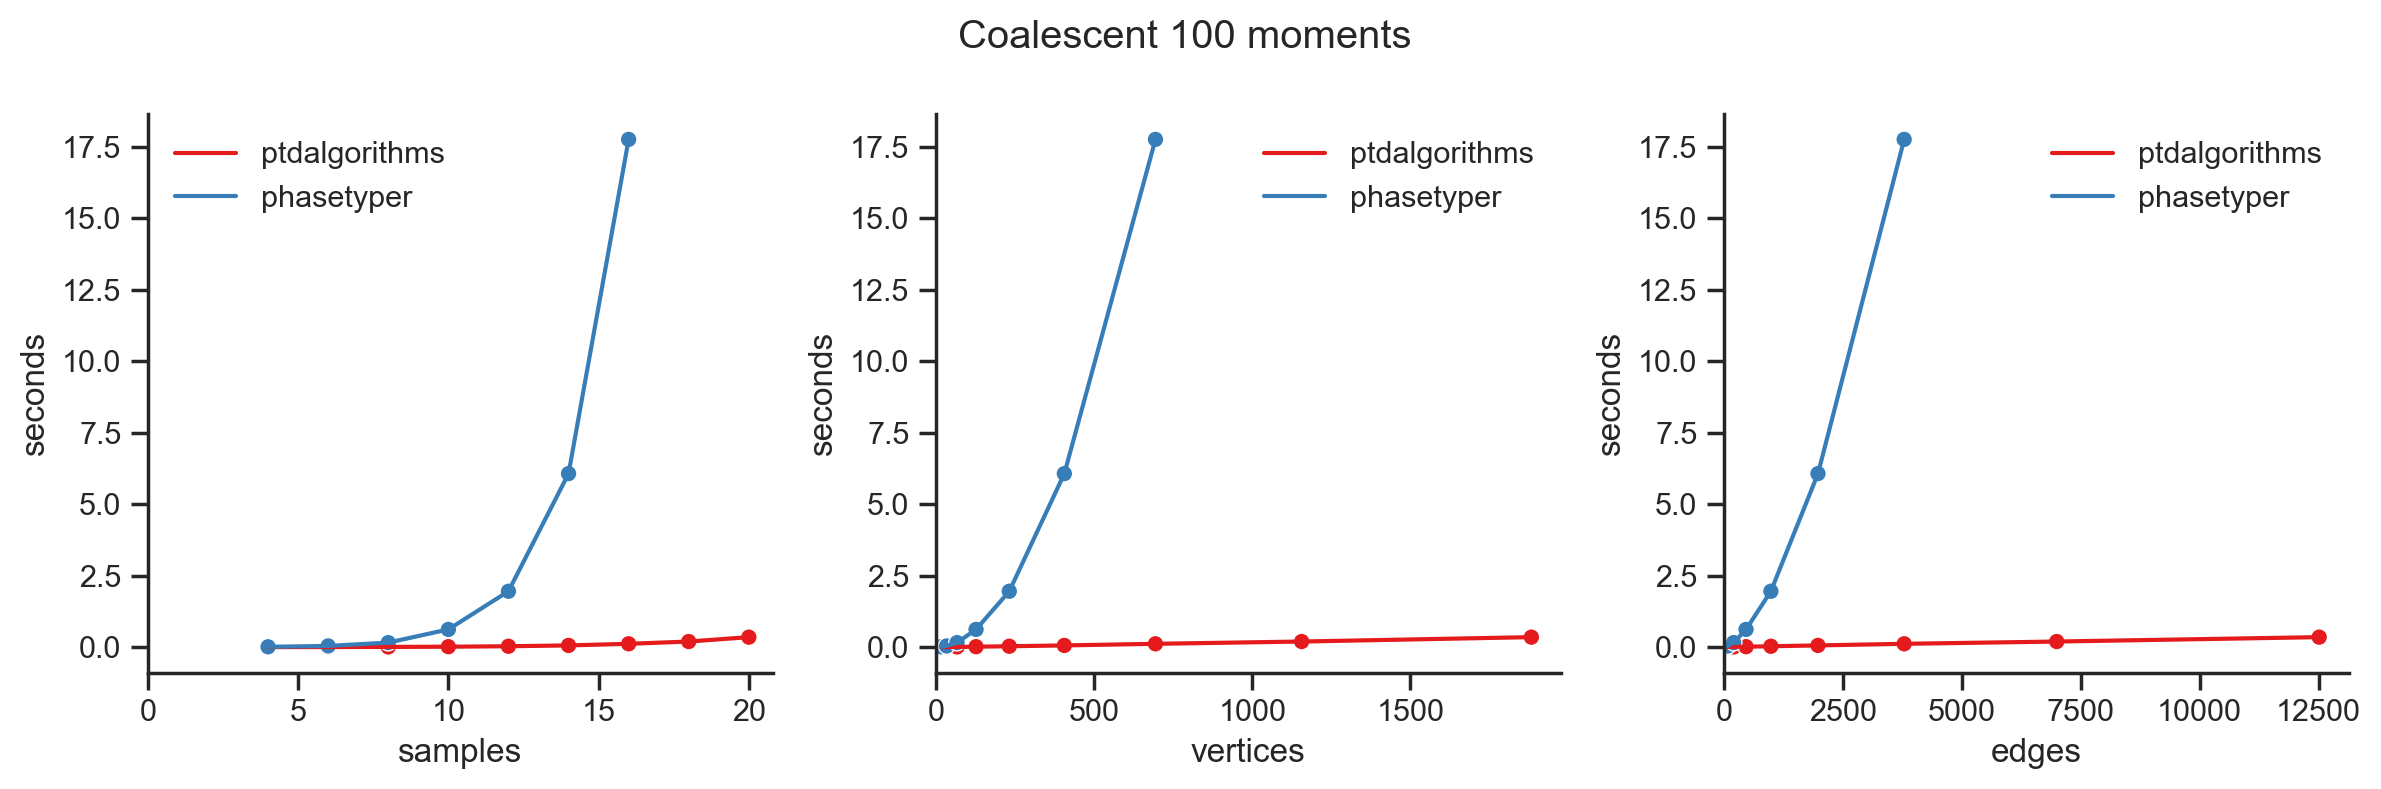

In [37]:
plot_df = (moments100_df.groupby(['val', 'vertices', 'edges'])
 .agg('mean') 
 .reset_index()
 .rename(columns={'val': 'samples',
                  'ptdalgorithms_time': 'ptdalgorithms', 
                  'phasetyper_time': 'phasetyper',
                  'matrixdist_time': 'matrixdist::moment()',
                  'matrixdist_inverse_time': 'matrixdist::inverse_matrix()',
                  'solve_time': 'base::solve()'
                 })
 .melt(id_vars=['samples', 'vertices', 'edges'], 
       value_name='seconds', var_name='Method')
)
plot_df = plot_df.loc[plot_df.seconds < 40]
fig, axes = runtime_plot(plot_df, ['samples', 'vertices', 'edges'],
                         'seconds', 'Method', legend_title=False, plot_title="Coalescent 100 moments")
for ax in axes:
    ax.set_xlim(left=0)
plt.savefig(f'figures/moments_100_coal_timeinhom.pdf')

In [45]:
# df = pd.pivot(plot_df, index='samples', columns='Method', values=['seconds']).reset_index()
# plt.plot(df.samples, df.seconds.phasetyper / df.seconds.ptdalgorithms)

In [48]:
# plot_df.groupby('Method').samples.max()

In [40]:
cdf100_df = pd.read_hdf(f'benchmark_data/cdf100_df_coal_timeinhom.hdf')

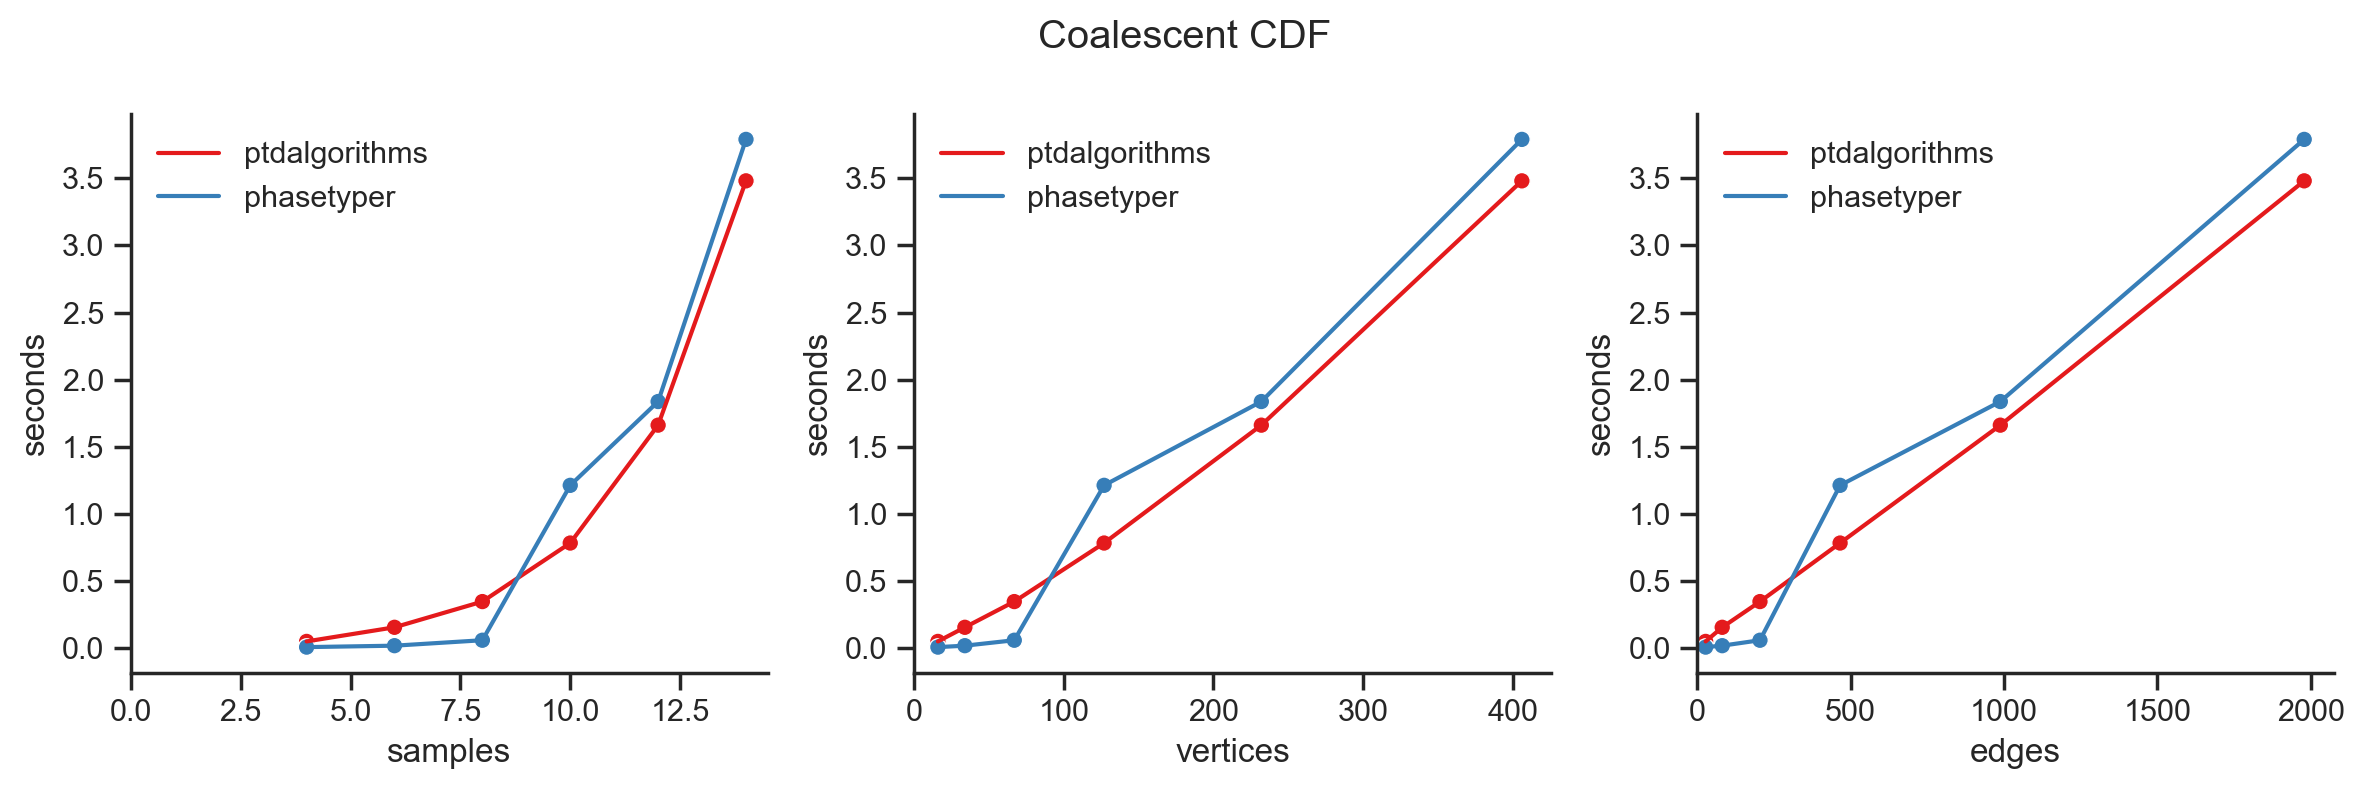

In [41]:
plot_df = (cdf100_df.groupby(['val', 'vertices', 'edges'])
 .agg('mean') 
 .reset_index()
 .rename(columns={'val': 'samples',
                  'ptdalgorithms_time': 'ptdalgorithms', 
                  'phasetyper_time': 'phasetyper'})
 .melt(id_vars=['samples', 'vertices', 'edges'], 
       value_name='seconds', var_name='Method')
)
plot_df = plot_df.loc[plot_df.seconds < 5]
fig, axes = runtime_plot(plot_df, ['samples', 'vertices', 'edges'],
                         'seconds', 'Method', legend_title=False,  plot_title="Coalescent CDF")
for ax in axes:
    ax.set_xlim(left=0)
plt.savefig(f'figures/cdf100_coal_timeinhom.pdf')

In [46]:
# df = pd.pivot(plot_df, index='samples', columns='Method', values=['seconds']).reset_index()
# plt.plot(df.samples, df.seconds.phasetyper / df.seconds.ptdalgorithms)

In [47]:
# plot_df.groupby('Method').samples.max()

## Coalescent

In [51]:
construction_df = pd.read_hdf(f'benchmark_data/construction_df_coalescent.hdf')

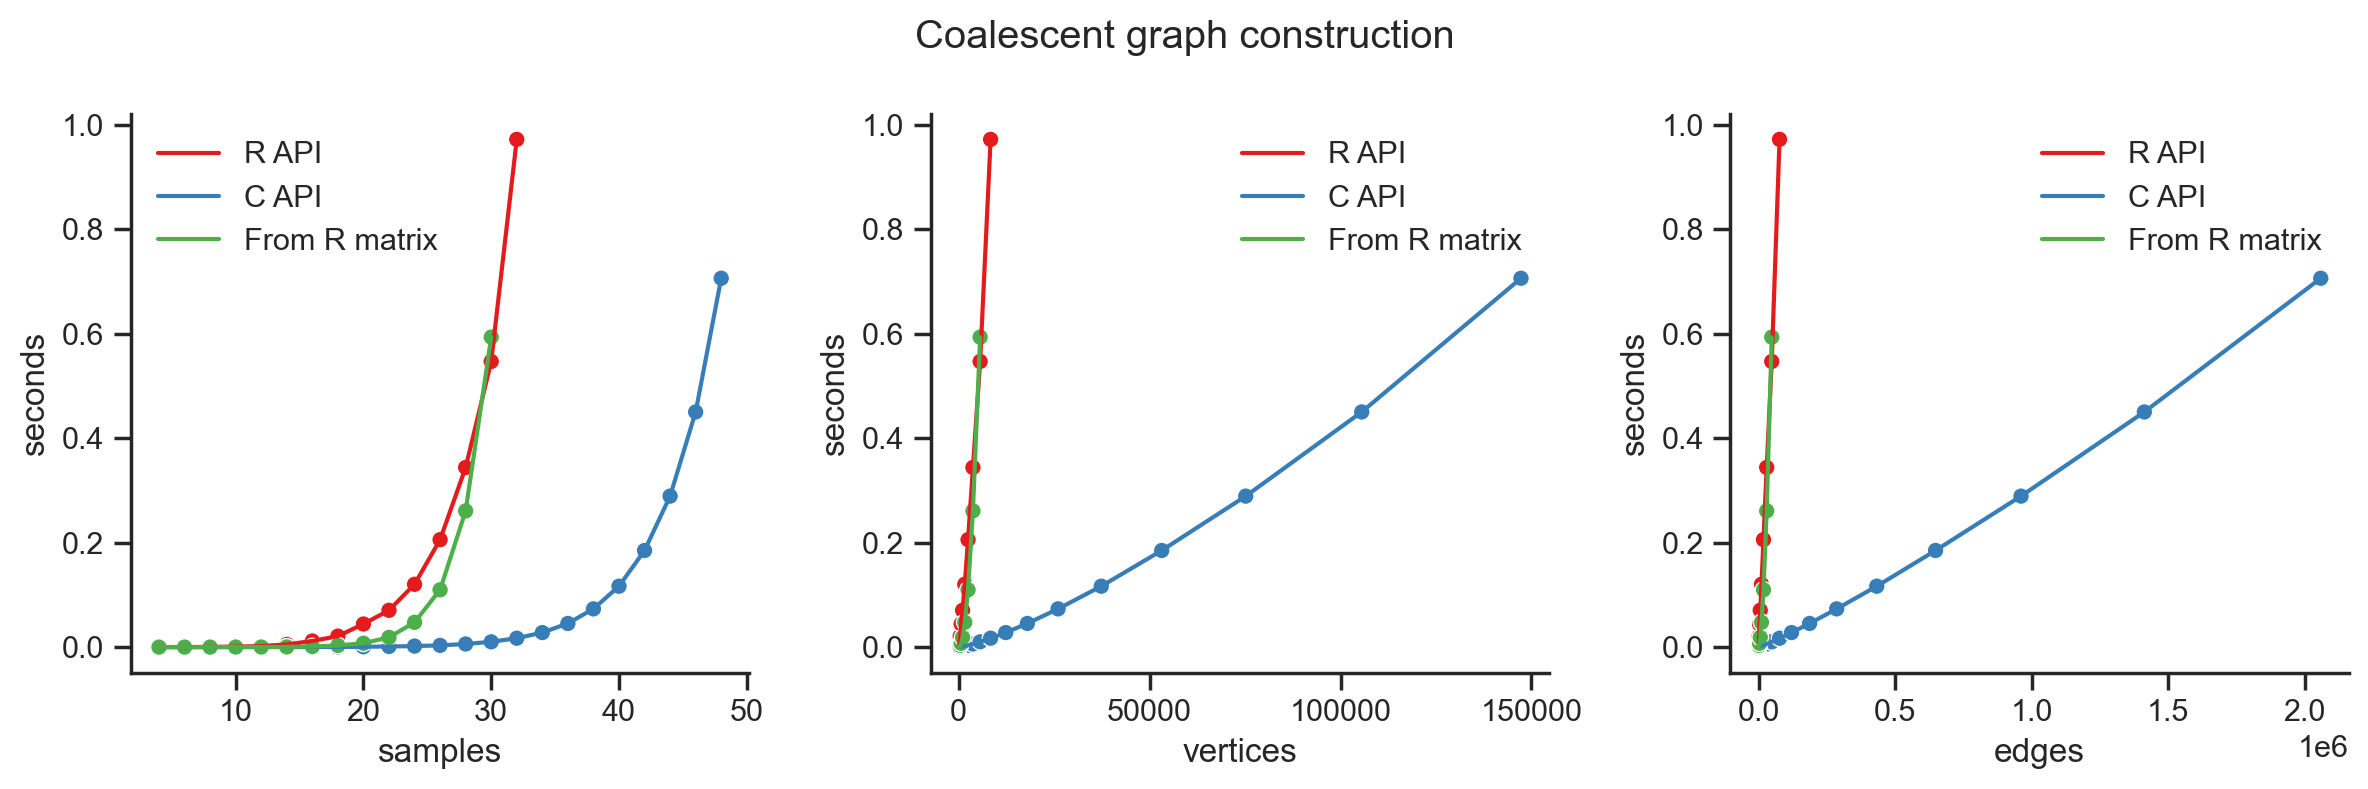

In [53]:
plot_df = (construction_df.groupby(['val', 'vertices', 'edges'])
 .agg('mean') 
 .reset_index()
 .rename(columns={'val': 'samples', 'time_c': 'C API', 'time_R': 'R API', 'time_from_matrix': 'From R matrix'})
 .melt(id_vars=['samples', 'vertices', 'edges'], value_name='seconds', var_name='API')
)
plot_df = plot_df.loc[plot_df.seconds < 2]

fig, axes = runtime_plot(plot_df, ['samples', 'vertices', 'edges'], 'seconds', 'API', 
            legend_title=False, plot_title="Coalescent graph construction")

plt.savefig(f'figures/construction_coalescent.pdf')

In [54]:
plot_df.groupby('API').samples.max()

API
C API            48.0
From R matrix    30.0
R API            32.0
Name: samples, dtype: float64

In [32]:
expectation_df = pd.read_hdf(f'benchmark_data/expectation_df_coalescent.hdf')

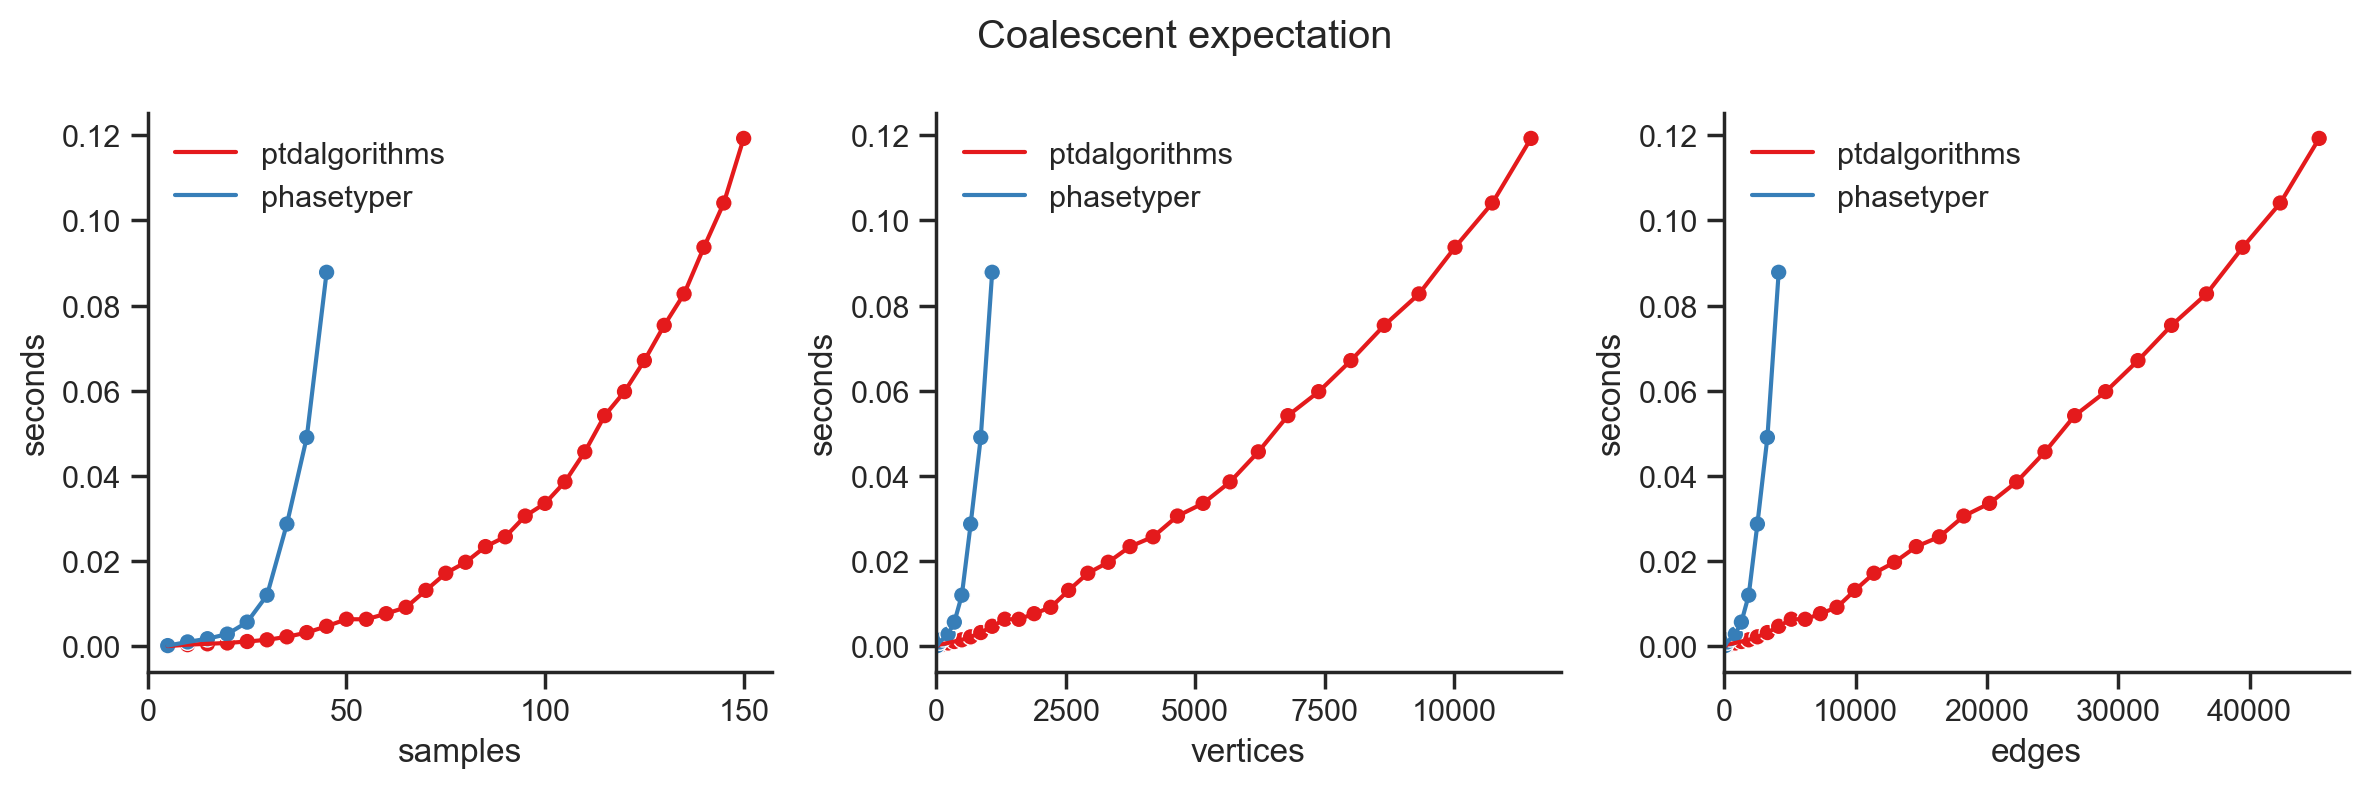

In [47]:

plot_df = (expectation_df.groupby(['val', 'vertices', 'edges'])
 .agg('mean') 
 .reset_index()
 .rename(columns={'val': 'samples',
                  'ptdalgorithms_time': 'ptdalgorithms', 
                  'phasetyper_time': 'phasetyper',
                  'matrixdist_time': 'matrixdist::moment()',
                  'matrixdist_inverse_time': 'matrixdist::inverse_matrix()',
                  'solve_time': 'base::solve()'
                 })
 .melt(id_vars=['samples', 'vertices', 'edges'], 
       value_name='seconds', var_name='Method')
)
plot_df = plot_df.loc[plot_df.seconds < 0.15]
fig, axes = runtime_plot(plot_df, ['samples', 'vertices', 'edges'],
                         'seconds', 'Method', legend_title=False, plot_title="Coalescent expectation")
for ax in axes:
    ax.set_xlim(left=0)
plt.savefig(f'figures/expectation_coalescent.pdf')

In [25]:
sfs_df = pd.read_hdf(f'benchmark_data/sfs_df{str(label[0])}.hdf')

In [26]:
sfs_df

val  coal_ptdalgorithms_time  coal_vertices  coal_edges  \
1      4.0                      0.0            6.0         6.0   
2      4.0                      0.0            6.0         6.0   
3      4.0                      0.0            6.0         6.0   
4      4.0                      0.0            6.0         6.0   
5      4.0                      0.0            6.0         6.0   
...    ...                      ...            ...         ...   
1696  70.0                      NaN            NaN         NaN   
1697  70.0                      NaN            NaN         NaN   
1698  70.0                      NaN            NaN         NaN   
1699  70.0                      NaN            NaN         NaN   
1700  70.0                      NaN            NaN         NaN   

      block_ptdalgorithms_time  block_vertices  block_edges  
1                        0.000             5.0          4.0  
2                        0.001             5.0          4.0  
3                        0.000             5.0          4.0  
4                        0.000             5.0          4.0  
5                        0.000             5.0          4.0  
...                        ...             ...          ...  
1696                     0.000            71.0         70.0  
1697                     0.000            71.0         70.0  
1698                     0.000            71.0         70.0  
1699                     0.000            71.0         70.0  
1700                     0.000            71.0         70.0  

[1700 rows x 7 columns]

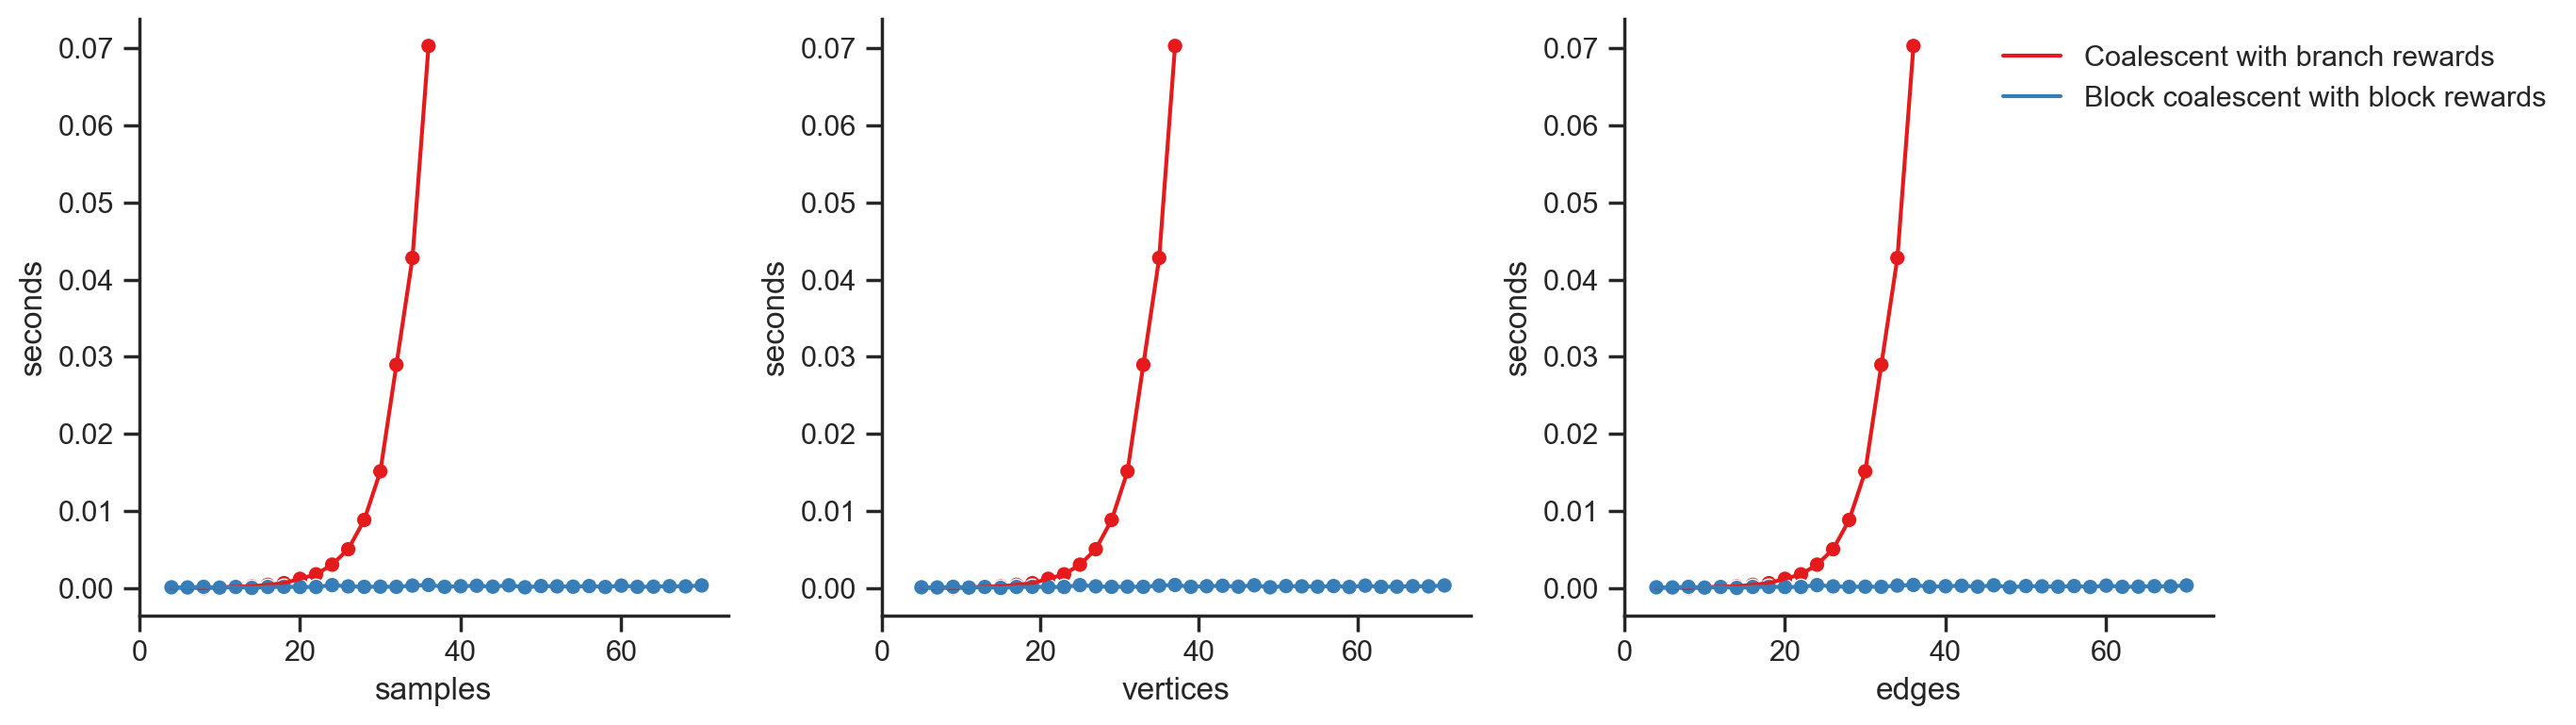

In [27]:
# def runtime_plot(plot_df, x_labels, y_label, hue_label, 
#                  colors=['#E41A1B', 'lightseagreen', '#4EAF4A'], 
#                  legend=True, legend_title=True, plot_title=None):
    
#     with sns.color_palette(colors):
#     # with sns.color_palette("Set1"):
#         # gs_kw = dict(height_ratios=[50] + [1]*(len(x_labels)-1))
#         fig, axes = plt.subplots(1, len(x_labels), 
#                                  figsize=(12, 4), 
#                                  # gridspec_kw=gs_kw
#                                 )

#         # sns.scatterplot(data=plot_df, x=x_labels[0], y=y_label, hue=hue_label, legend=False, ax=axes[0])    
#         # ax = sns.lineplot(data=plot_df, x=x_labels[0], y='seconds', hue=hue_label, ax=axes[0])
#         # ax.set_yscale('log')


#         for i in range(0, len(x_labels)):
#             sns.scatterplot(data=plot_df, x=x_labels[i], y=y_label, hue=hue_label, legend=False, ax=axes[i])    
#             ax = sns.lineplot(data=plot_df, x=x_labels[i], y='seconds', hue=hue_label, ax=axes[i])

#             if not legend_title:
#                 legend = axes[i].legend()
#                 legend.set_title("")
        
#             leg = ax.get_legend()
#             leg.get_frame().set_linewidth(0.0)
            
#             if not legend:
#                 axes[i].get_legend().remove()
    
#             sns.despine()

#         if plot_title:
#             plt.suptitle(plot_title)
        
#         # ax = sns.scatterplot(data=plot_df, x=x_labels[i], y=y_label, hue=hue_label, legend=False, ax=axes[i], alpha=1) 
# #            axes[i].get_yaxis().set_visible(False)
#         plt.tight_layout()
#     return fig, axes
    
plot_df = (sfs_df
           .drop(columns=['coal_vertices', 'coal_edges'])
           .groupby(['val', 'block_vertices', 'block_edges'])
 .agg('mean') 
 .reset_index()
 .rename(columns={'val': 'samples',
                  'coal_ptdalgorithms_time': 'Coalescent with branch rewards', 
                  'block_ptdalgorithms_time': 'Block coalescent with block rewards', 
                  'block_vertices': 'vertices', 
                  'block_edges': 'edges', 
                 })
 .melt(id_vars=['samples', 'vertices', 'edges'], 
       value_name='seconds', var_name='Method')
)


#plot_df = plot_df.loc[plot_df.seconds < 0.15]
fig, axes = runtime_plot(plot_df, ['samples', 'vertices', 'edges'],
                         'seconds', 'Method', legend_title=False, #plot_title="SFS",
                 colors=['#E41A1B',  '#4EAF4A'], 
                        )
axes[0].legend().remove()
axes[1].legend().remove()
axes[2].legend(bbox_to_anchor=(0.6, 1), frameon=False)

for ax in axes:
    ax.set_xlim(left=0)
plt.savefig(f'figures/expectation_block_coalescent.pdf')

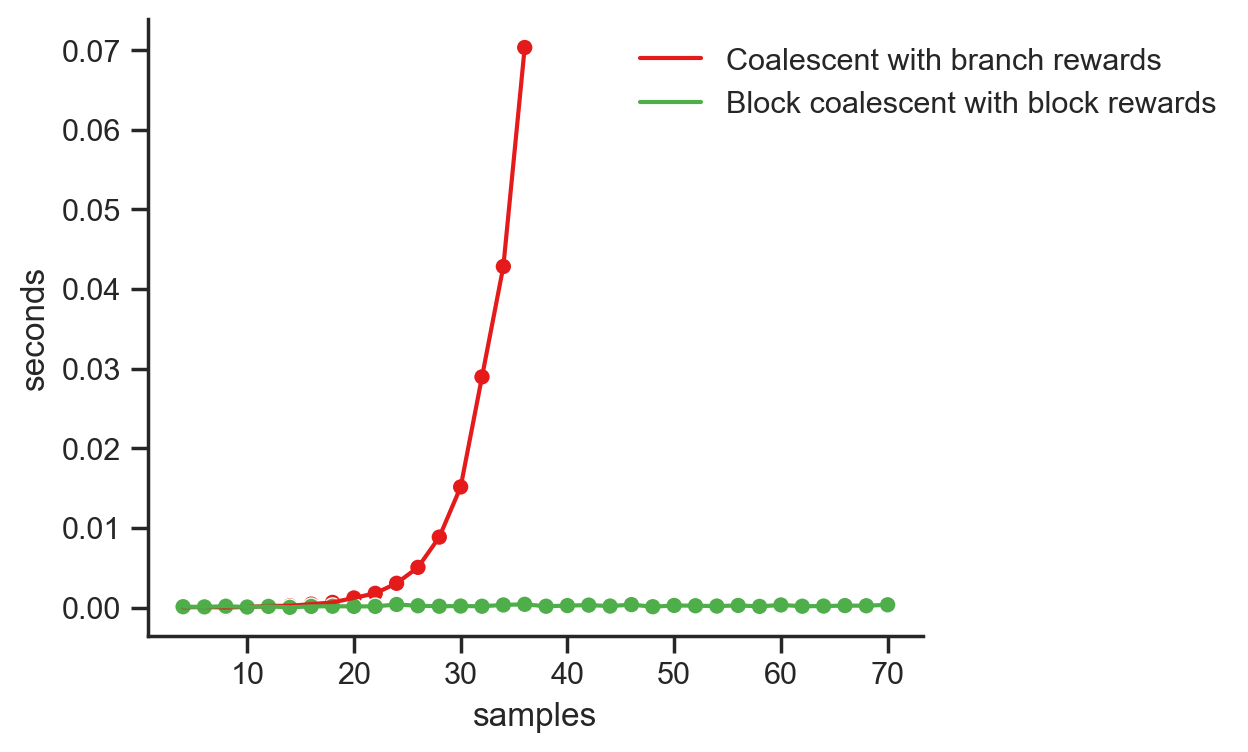

In [31]:
with sns.color_palette(['#E41A1B',  '#4EAF4A']):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    sns.scatterplot(data=plot_df, x="samples", y="seconds", hue="Method", legend=False, ax=ax)    
    ax = sns.lineplot(data=plot_df, x="samples", y='seconds', hue="Method", ax=ax)

ax.legend(bbox_to_anchor=(0.6, 1), frameon=False)
# if not legend_title:
#     legend = axes[i].legend()
#     legend.set_title("")

# leg = ax.get_legend()
# leg.get_frame().set_linewidth(0.0)

# if not legend:
#     axes[i].get_legend().remove()

sns.despine()
plt.savefig(f'figures/expectation_block_coalescent_single.pdf')

In [29]:
df = pd.pivot(plot_df, index='samples', columns='Method', values=['seconds']).reset_index()
plt.plot(df.samples, df.seconds.phasetyper / df.seconds.ptdalgorithms)

AttributeError: 'DataFrame' object has no attribute 'phasetyper'

In [30]:
plot_df.groupby('Method').samples.max()

Method
Block coalescent with block rewards    70.0
Coalescent with branch rewards         70.0
Name: samples, dtype: float64

In [17]:
moments100_df = pd.read_hdf(f'benchmark_data/moments100_df_coalescent.hdf')

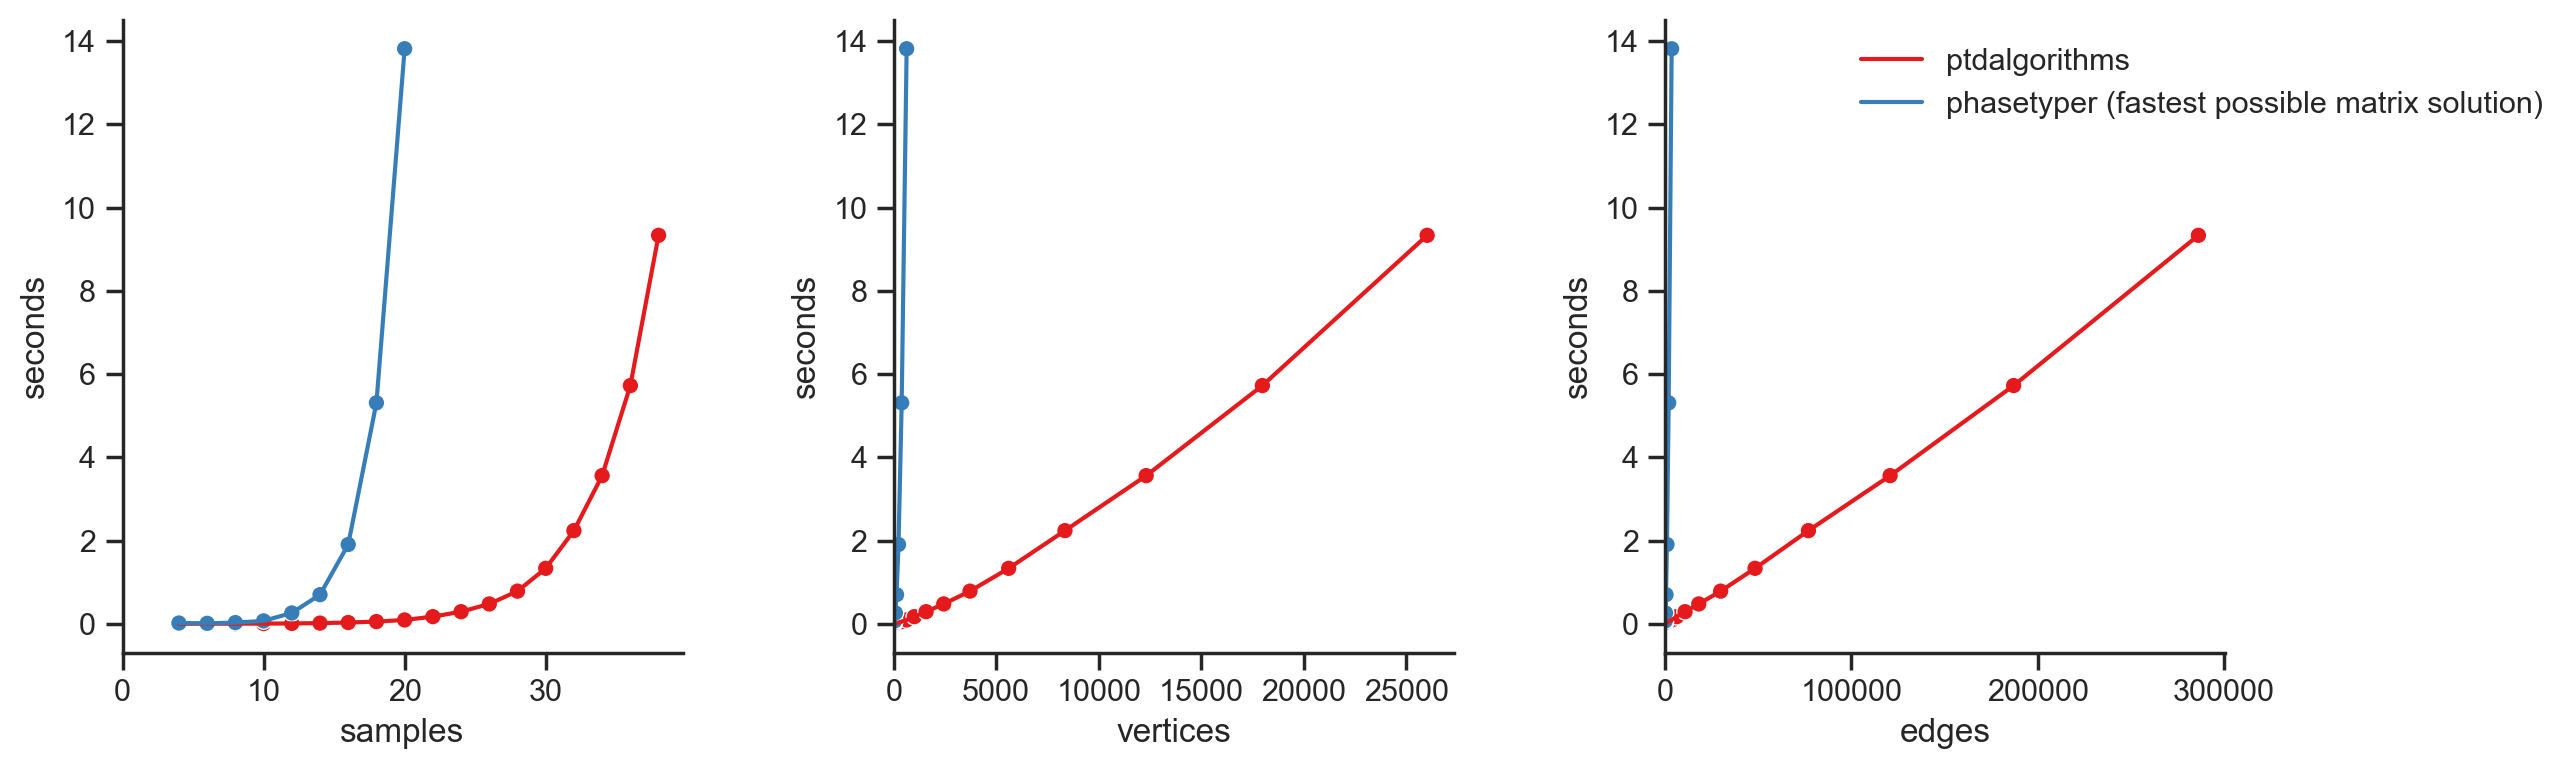

In [23]:
plot_df = (moments100_df.groupby(['val', 'vertices', 'edges'])
 .agg('mean') 
 .reset_index()
 .rename(columns={'val': 'samples',
                  'ptdalgorithms_time': 'ptdalgorithms', 
                  'phasetyper_time': 'phasetyper (fastest possible matrix solution)',
                  'matrixdist_time': 'matrixdist::moment()',
                  'matrixdist_inverse_time': 'matrixdist::inverse_matrix()',
                  'solve_time': 'base::solve()'
                 })
 .melt(id_vars=['samples', 'vertices', 'edges'], 
       value_name='seconds', var_name='Method')
)
plot_df = plot_df.loc[plot_df.seconds < 40]
fig, axes = runtime_plot(plot_df, ['samples', 'vertices', 'edges'],
                         'seconds', 'Method', legend_title=False #, plot_title="Coalescent 100 moments"
                        )
axes[0].legend().remove()
axes[1].legend().remove()
axes[2].legend(bbox_to_anchor=(0.3, 1), frameon=False)
                        
                        
for ax in axes:
    ax.set_xlim(left=0)
plt.savefig(f'figures/moments_100_coalescent.pdf')

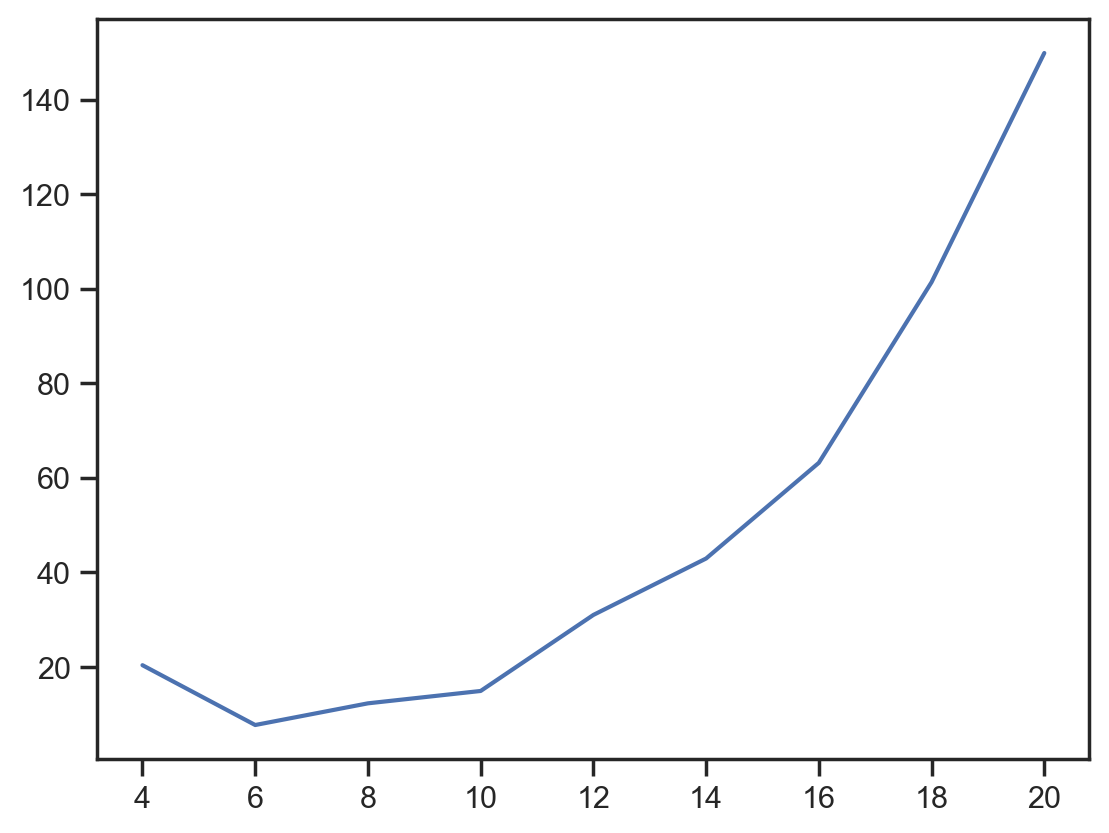

In [61]:
df = pd.pivot(plot_df, index='samples', columns='Method', values=['seconds']).reset_index()
plt.plot(df.samples, df.seconds.phasetyper / df.seconds.ptdalgorithms)

In [62]:
plot_df.groupby('Method').samples.max()

Method
phasetyper       20.0
ptdalgorithms    38.0
Name: samples, dtype: float64

In [63]:
cdf100_df = pd.read_hdf(f'benchmark_data/cdf100_df_coalescent.hdf')

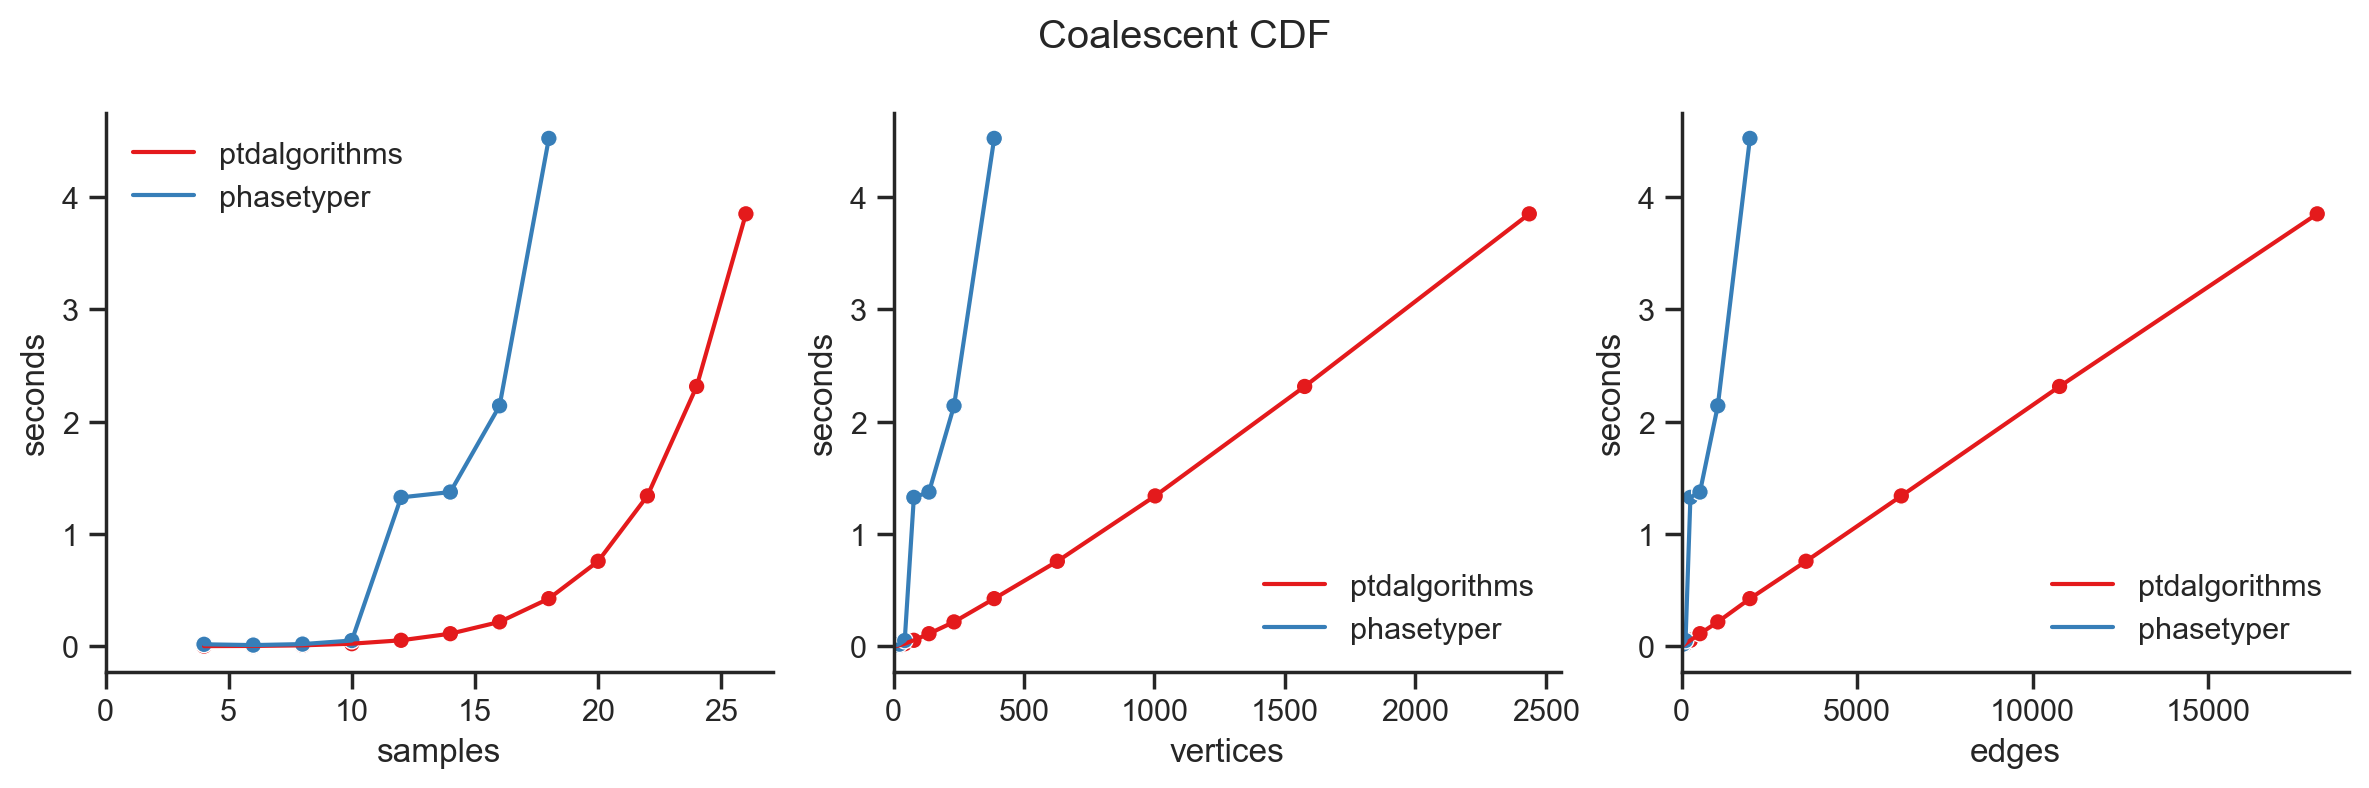

In [64]:
plot_df = (cdf100_df.groupby(['val', 'vertices', 'edges'])
 .agg('mean') 
 .reset_index()
 .rename(columns={'val': 'samples',
                  'ptdalgorithms_time': 'ptdalgorithms', 
                  'phasetyper_time': 'phasetyper'})
 .melt(id_vars=['samples', 'vertices', 'edges'], 
       value_name='seconds', var_name='Method')
)
plot_df = plot_df.loc[plot_df.seconds < 5]
fig, axes = runtime_plot(plot_df, ['samples', 'vertices', 'edges'],
                         'seconds', 'Method', legend_title=False,  plot_title="Coalescent CDF")
for ax in axes:
    ax.set_xlim(left=0)
plt.savefig(f'figures/cdf100_coalescent.pdf')

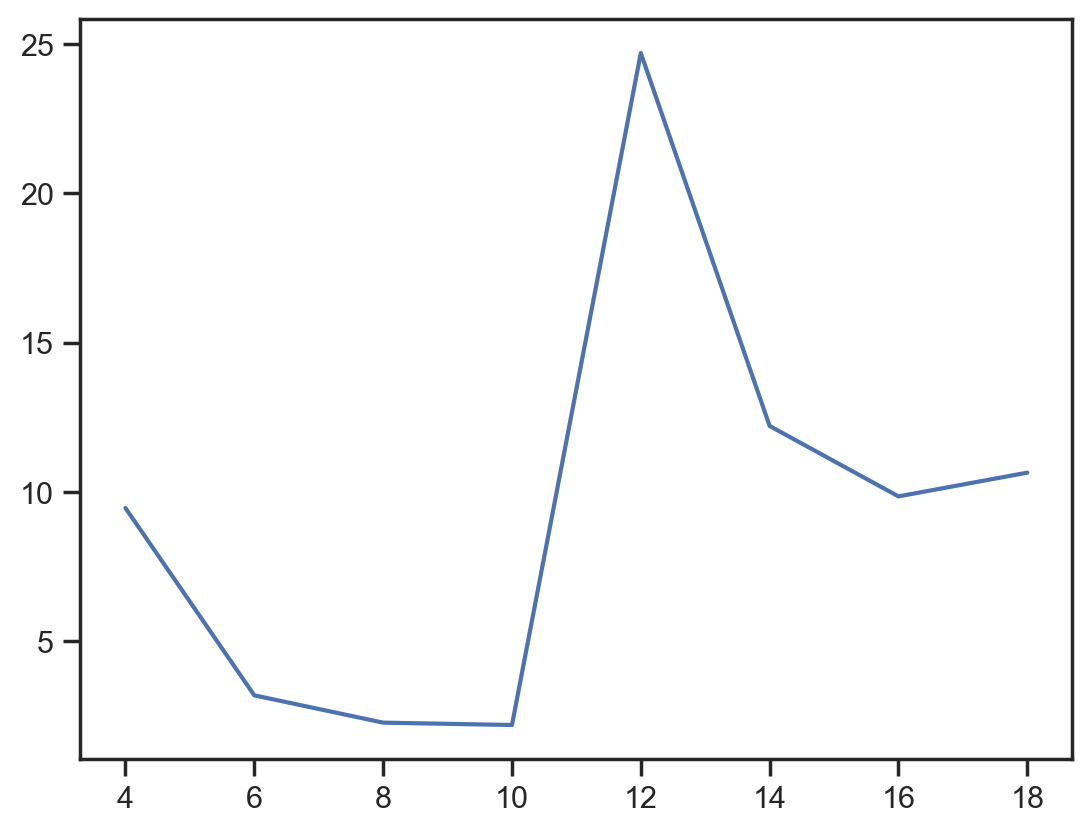

In [65]:
df = pd.pivot(plot_df, index='samples', columns='Method', values=['seconds']).reset_index()
plt.plot(df.samples, df.seconds.phasetyper / df.seconds.ptdalgorithms)

In [66]:
plot_df.groupby('Method').samples.max()

Method
phasetyper       18.0
ptdalgorithms    26.0
Name: samples, dtype: float64

## Rabbits

In [ ]:
construction_df = pd.read_hdf(f'benchmark_data/construction_df_rabbits.hdf')

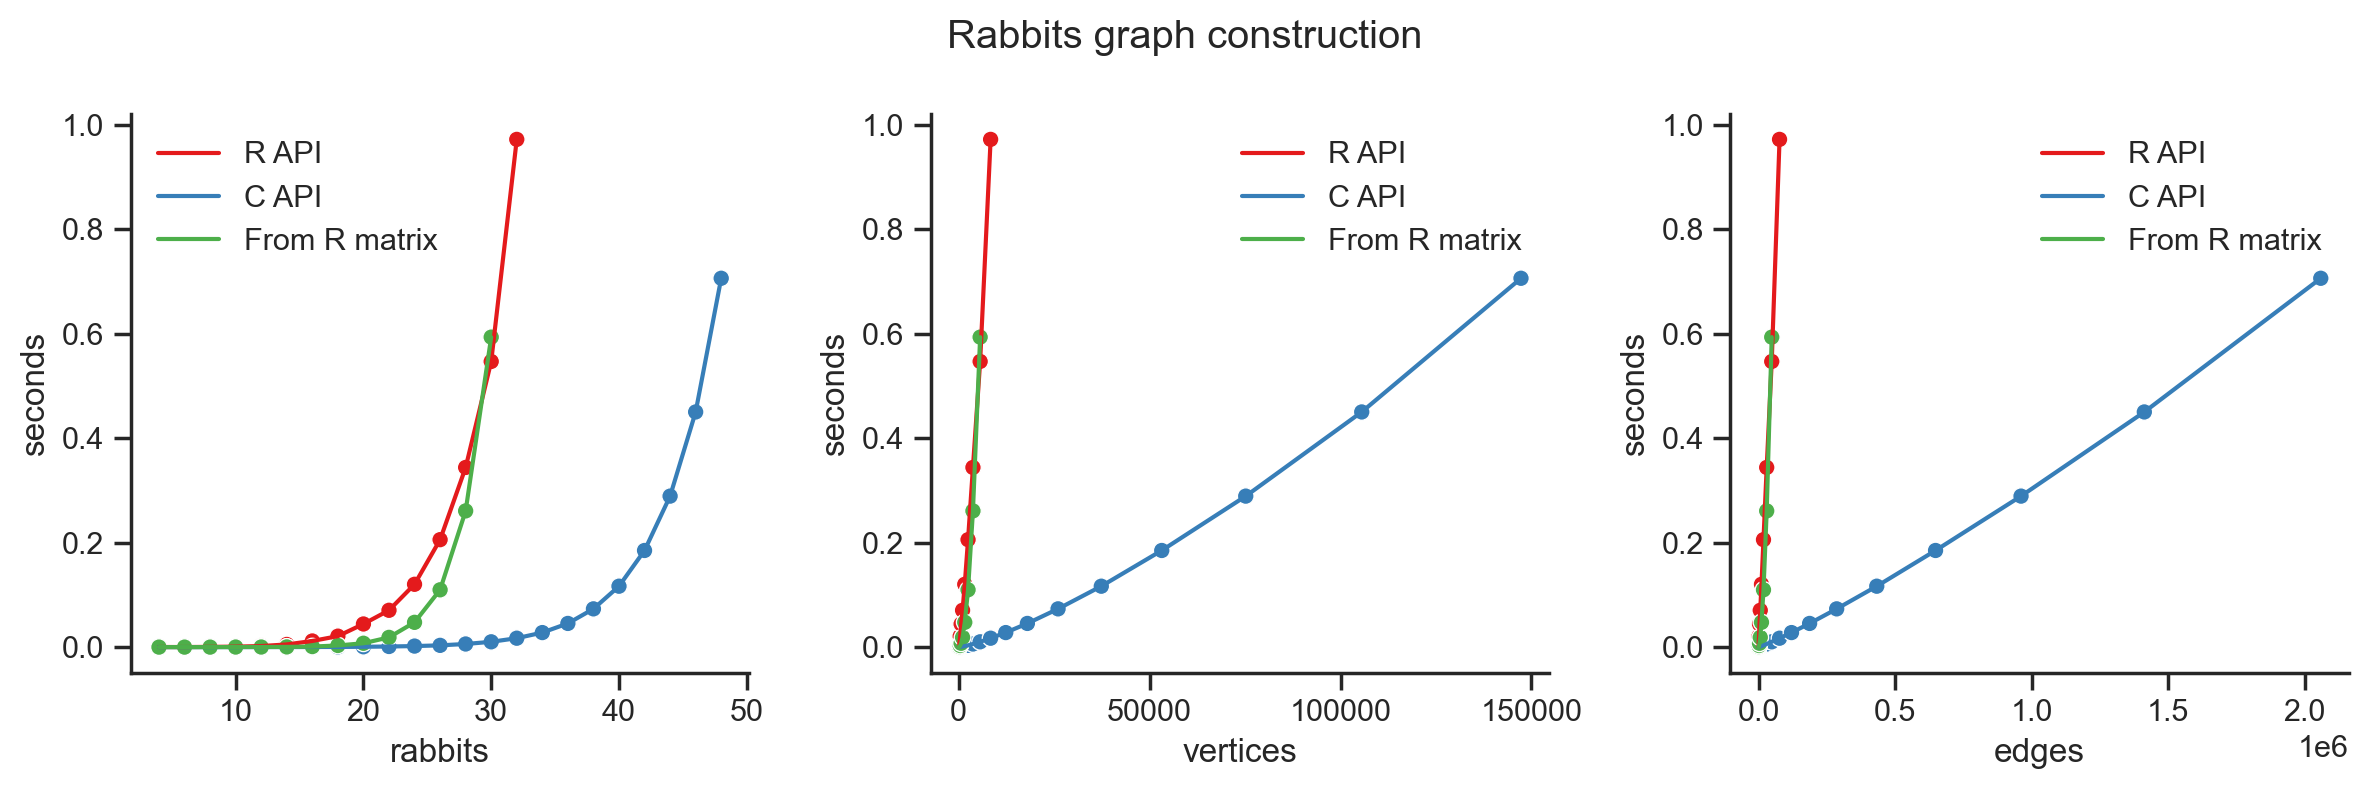

In [67]:
plot_df = (construction_df.groupby(['val', 'vertices', 'edges'])
 .agg('mean') 
 .reset_index()
 .rename(columns={'val': 'rabbits', 'time_c': 'C API', 'time_R': 'R API', 'time_from_matrix': 'From R matrix'})
 .melt(id_vars=['rabbits', 'vertices', 'edges'], value_name='seconds', var_name='API')
)
plot_df = plot_df.loc[plot_df.seconds < 2]
fig, axes = runtime_plot(plot_df, ['rabbits', 'vertices', 'edges'], 'seconds', 'API', 
            legend_title=False, plot_title="Rabbits graph construction")

plt.savefig(f'figures/construction_rabbits.pdf')

In [68]:
plot_df.groupby('API').rabbits.max()

API
C API            48.0
From R matrix    30.0
R API            32.0
Name: rabbits, dtype: float64

In [69]:
expectation_df = pd.read_hdf(f'benchmark_data/expectation_df_rabbits.hdf')

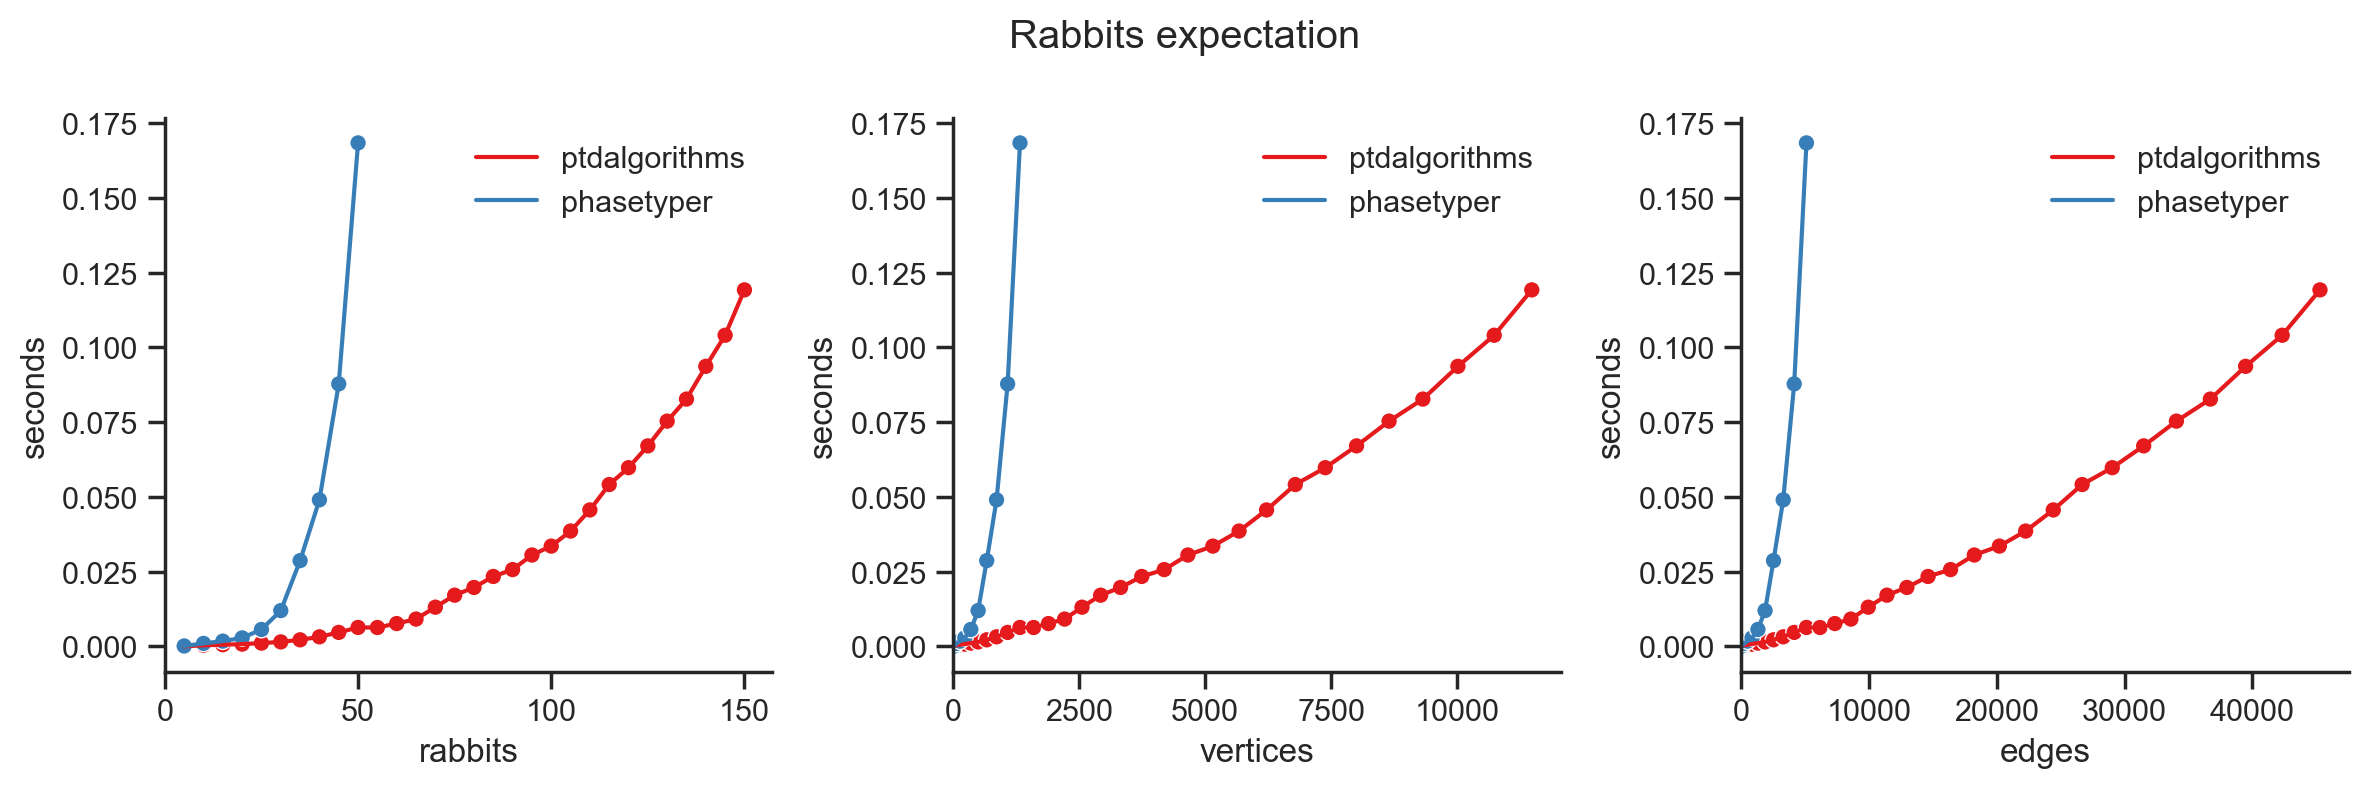

In [70]:
plot_df = (expectation_df.groupby(['val', 'vertices', 'edges'])
 .agg('mean') 
 .reset_index()
 .rename(columns={'val': 'rabbits',
                  'ptdalgorithms_time': 'ptdalgorithms', 
                  'phasetyper_time': 'phasetyper',
                  'matrixdist_time': 'matrixdist::moment()',
                  'matrixdist_inverse_time': 'matrixdist::inverse_matrix()',
                  'solve_time': 'base::solve()'
                 })
 .melt(id_vars=['rabbits', 'vertices', 'edges'], 
       value_name='seconds', var_name='Method')
)
plot_df = plot_df.loc[plot_df.seconds < 0.2]
fig, axes = runtime_plot(plot_df, ['rabbits', 'vertices', 'edges'],
                         'seconds', 'Method', legend_title=False, plot_title="Rabbits expectation")
for ax in axes:
    ax.set_xlim(left=0)
plt.savefig(f'figures/expectation_rabbits.pdf')

In [71]:
plot_df.groupby('Method').rabbits.max()

Method
phasetyper        50.0
ptdalgorithms    150.0
Name: rabbits, dtype: float64

In [72]:
moments100_df = pd.read_hdf(f'benchmark_data/moments100_df_rabbits.hdf')

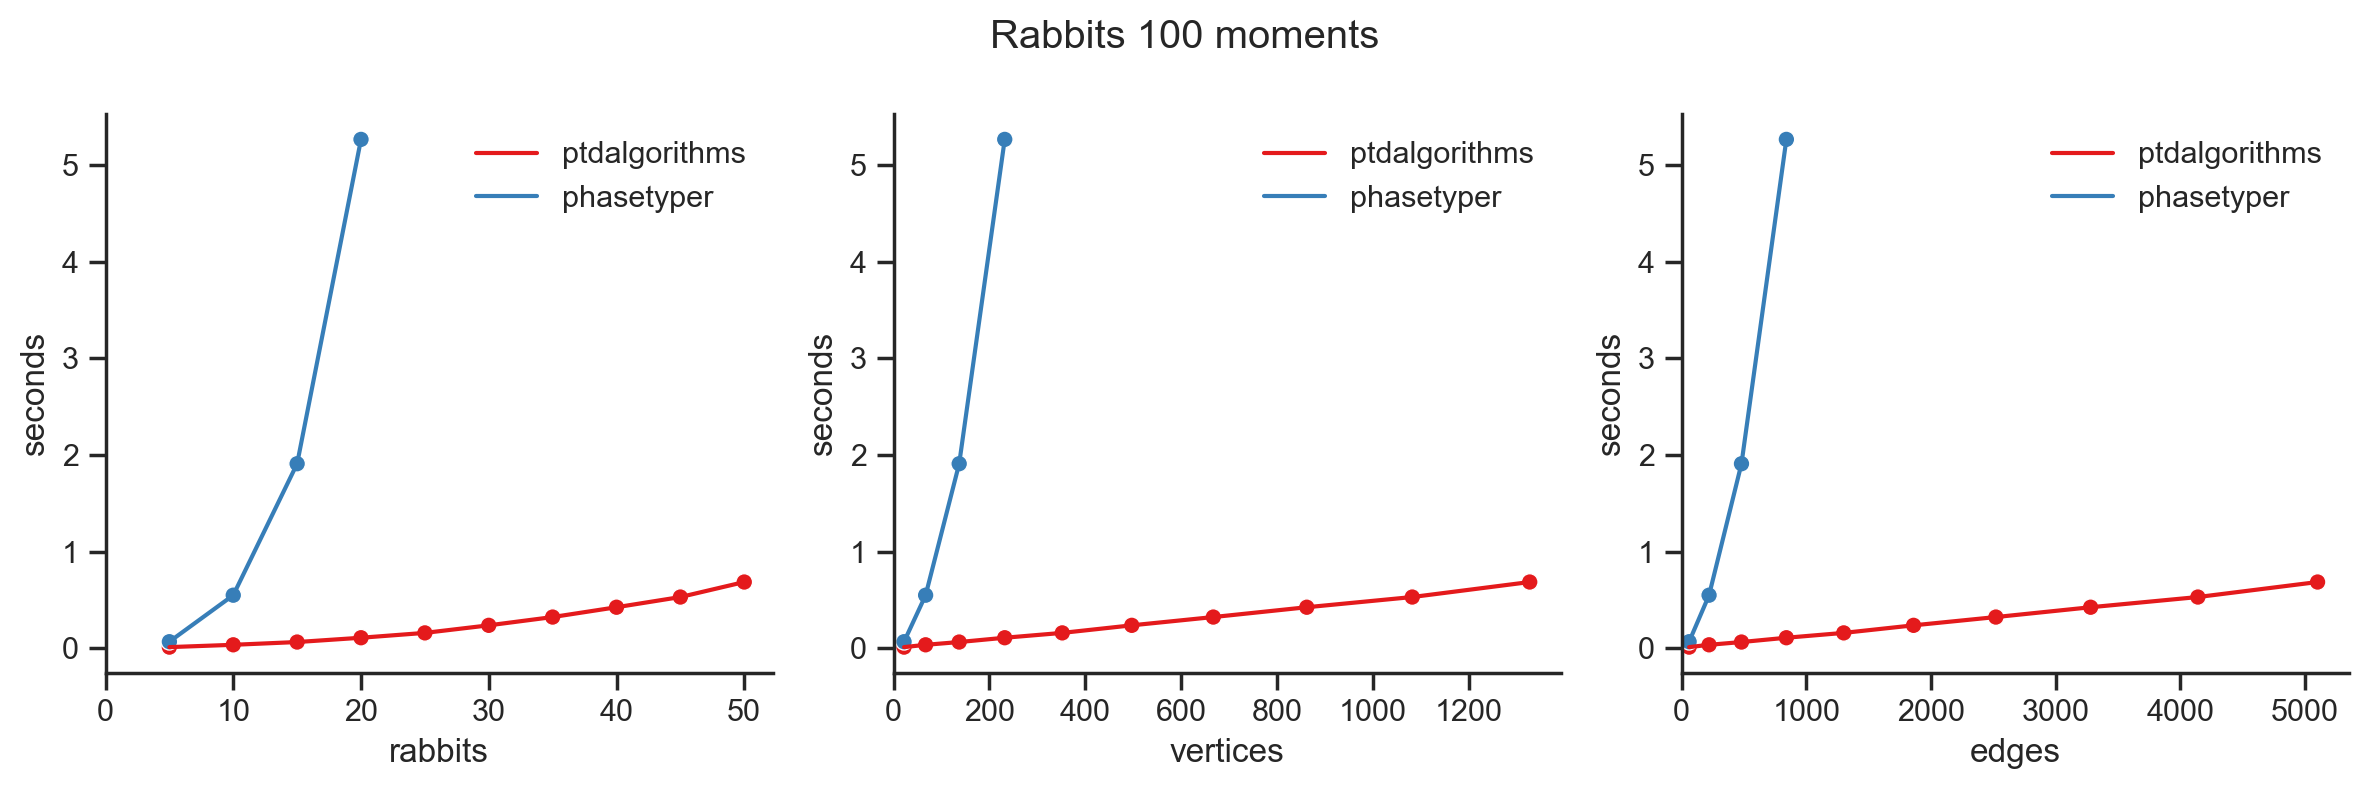

In [73]:
plot_df = (moments100_df.groupby(['val', 'vertices', 'edges'])
 .agg('mean') 
 .reset_index()
 .rename(columns={'val': 'rabbits',
                  'ptdalgorithms_time': 'ptdalgorithms', 
                  'phasetyper_time': 'phasetyper',
                  'matrixdist_time': 'matrixdist::moment()',
                  'matrixdist_inverse_time': 'matrixdist::inverse_matrix()',
                  'solve_time': 'base::solve()'
                 })
 .melt(id_vars=['rabbits', 'vertices', 'edges'], 
       value_name='seconds', var_name='Method')
)
plot_df = plot_df.loc[plot_df.seconds < 6]
fig, axes = runtime_plot(plot_df, ['rabbits', 'vertices', 'edges'],
                         'seconds', 'Method', legend_title=False, plot_title="Rabbits 100 moments")
for ax in axes:
    ax.set_xlim(left=0)
plt.savefig(f'figures/moments_100_rabbits.pdf')

In [74]:
plot_df.groupby('Method').rabbits.max()

Method
phasetyper       20.0
ptdalgorithms    50.0
Name: rabbits, dtype: float64

In [19]:
cdf100_df = pd.read_hdf(f'benchmark_data/cdf100_df_rabbits.hdf')

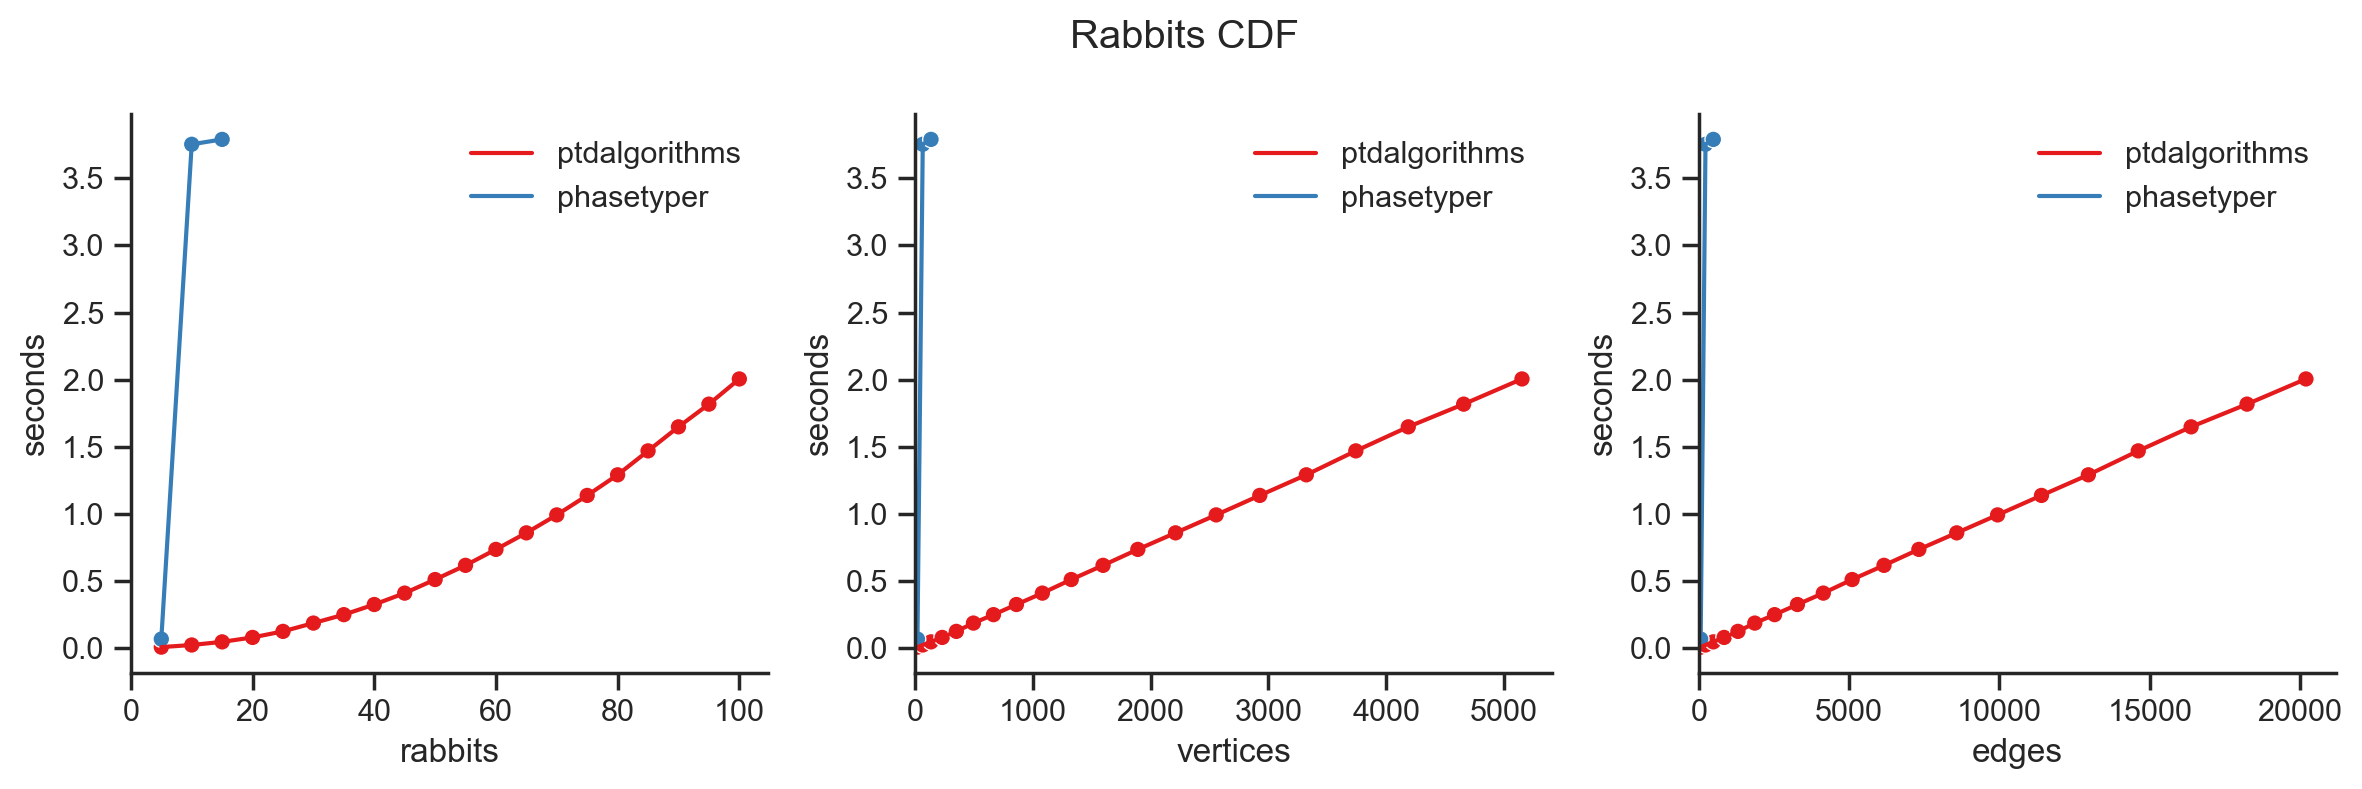

In [20]:
plot_df = (cdf100_df.groupby(['val', 'vertices', 'edges'])
 .agg('mean') 
 .reset_index()
 .rename(columns={'val': 'rabbits',
                  'ptdalgorithms_time': 'ptdalgorithms', 
                  'phasetyper_time': 'phasetyper'})
 .melt(id_vars=['rabbits', 'vertices', 'edges'], 
       value_name='seconds', var_name='Method')
)
plot_df = plot_df.loc[plot_df.seconds < 5]
fig, axes = runtime_plot(plot_df, ['rabbits', 'vertices', 'edges'],
                         'seconds', 'Method', legend_title=False, plot_title="Rabbits CDF")
for ax in axes:
    ax.set_xlim(left=0)
plt.savefig(f'figures/cdf100_rabbits.pdf')

In [ ]:
plot_df.groupby('Method').rabbits.max()

# OLD STUFF

# 100 marginal expecations (phasetyper, ptdalgorithms)

We agree that matrixdist::inverse_matrix is a bit faster than base:solve on the examples used. This means that phasetyper (which uses base solve) could gain some speed by using matrixdist::inverse_matrix.

We compare to phasetyper below  as it offers the same same functionality as ptdalgoritms.

# Distribution (CDF 100 vals)